<a href="https://colab.research.google.com/github/alfiramdhan/Data-Analytics-Portfolio/blob/main/%5BW6W7W8_MAY23%5D_alfiana_ramdhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A - Business Background

All data & calculations are as of January 31, 2023.

Business Background
- Over the past 6 months, RevoBank have new promotion for transactions in RevoShop
- Every eligible transactions, redeem a voucher and get 15 reward points (= 1.5 euro)
- At the same time, bank earns 2.4% margin from total transaction amounts

Business Objectives
1. `Provide an overview` of the promotion program's performance from RevoBank's perspective

2. `Identify different segments` of RevoBank credit card users who are RevoSHop customers

3. `Discover Business opportunities` to customize the rewards program for each customer *segment*

In [ ]:
# Importing Libraries

import pandas as pd               # Library used for working with data sets and perform data analysis.
import numpy as np                # To perform mathematical operasion and statistics
import shutil                     # To extract files in zip format
import gdown                      # To download files from Google Drive
from datetime import datetime     # Used to perform dates and time manipulation
import seaborn as sns             # To perform data visualization
import matplotlib.pyplot as plt   # To perform data visualization
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

# B - Load Dataset

Since this is a CSV data stored in the Google Drive, we will download it using `gdown`

In [ ]:
# Download dataset csv format from google drive
url = "https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view?usp=sharing"
output = 'bank_promotion_analysis.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe
To: /content/bank_promotion_analysis.csv
100%|██████████| 16.5M/16.5M [00:00<00:00, 45.5MB/s]


'bank_promotion_analysis.csv'

In [ ]:
# Read the csv file into pandas dataframe
df = pd.read_csv('/content/bank_promotion_analysis.csv')
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


### Data Dictionary

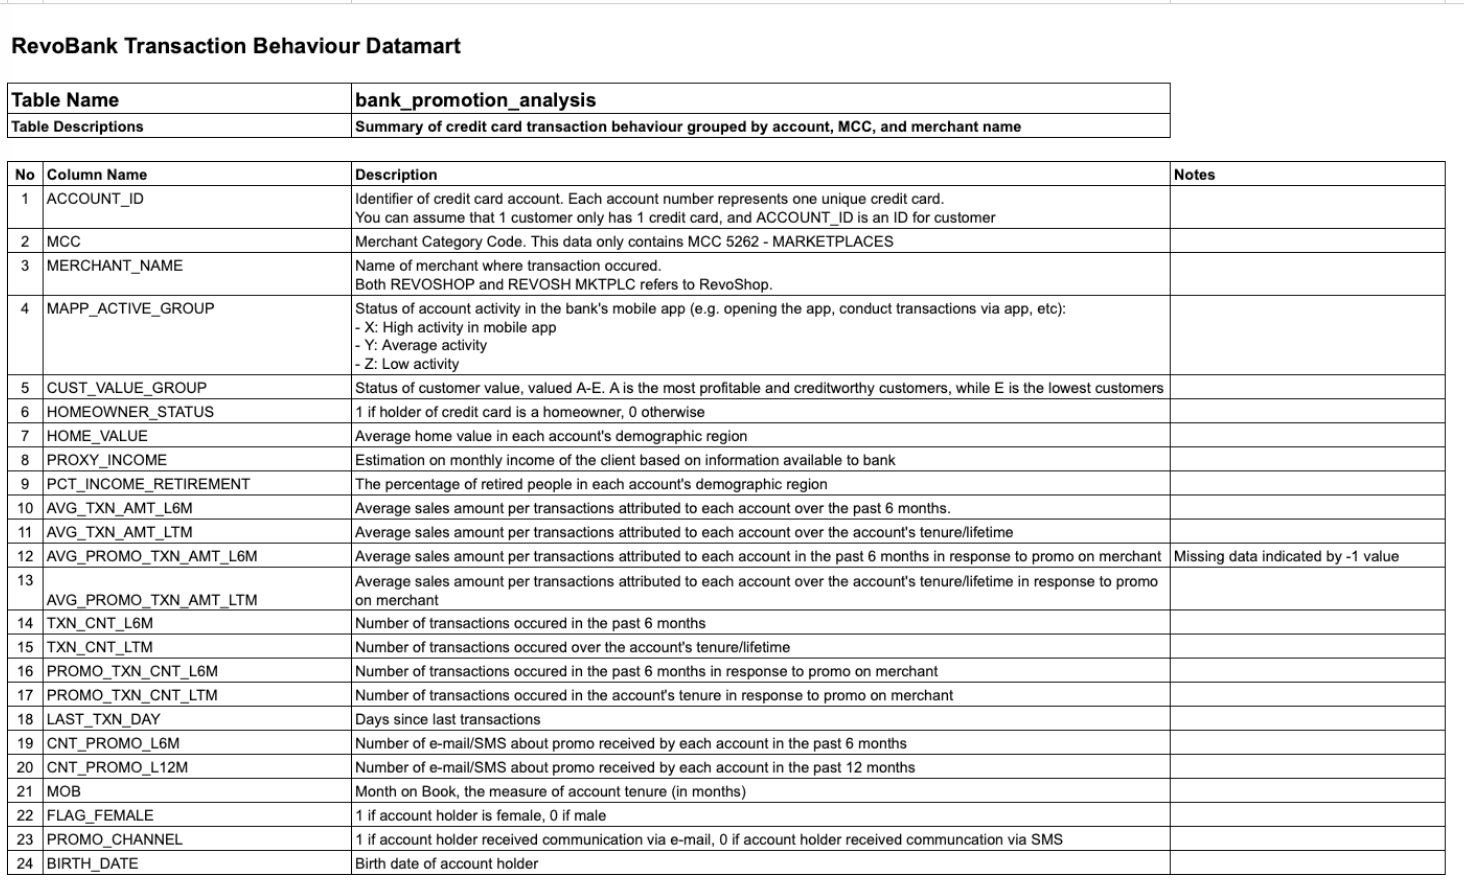

# C - Data Cleaning & Preparation

## 1) Diagnostics

We will first do our data cleaning diagnostics and then create new copy of the cleaned data.

### Head & Tail

In [ ]:
# First, we observe the head and tail of the data to spot any issues
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df.tail()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,0.0,24294.0,0.0,30.0,112.0,0.0,0.0,1982-05-14
112633,101059869,5311-DEPARTMENT STORES,EL CORTE INGLES,36.0,45.0,32.5,20.0,4.0,19.0,3.0,...,E,Y,0.0,32009.0,0.0,22.0,100.0,1.0,0.0,1983-12-17


Issue :

1. Based on the data, MCC should only contains MCC 5262 - MARKETPLACES but we can see MCC 5311 - DEPARTMENT STORES as well.

2. At least 3 merchant name are available in the data REVOSH MKTPL, REVOSHOP, and EL CORTE INGLES

3. As indicated in the data, REVOSH MKTPL and REVOSHOP should be under 1 merchant name : REVOSHOP

### Info & Missing Value

In [ ]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

From here we can see that birth_date is flagged as object -- need to change it as datetime.

In [ ]:
# Check missing value
df[df.isnull().any(axis='columns')]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


There's no missing values from df.info(), however we need to read the data dictionary to read the following:

`Missing data indicated by -1 value`

Therefore we need to find out any data that consist of -1 value

In [ ]:
df.describe()

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL
count,1.126340e+05,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000
mean,1.005322e+08,127.478237,107.330904,121.748952,120.357605,4.473063,20.091420,2.768276,10.307412,18.328693,5.753742,14.410826,0.529112,88521.650976,38141.285473,31.030373,101.480761,0.585063,0.300513
std,3.058731e+05,79.849703,75.395159,82.164770,76.666629,2.299819,8.902769,1.712656,4.383864,4.181466,1.409411,6.006054,0.499154,71826.805193,25894.347936,12.041558,25.552335,0.492713,0.458483
min,1.000000e+08,10.000000,17.300000,-1.000000,3.200000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,1.002677e+08,85.000000,70.000000,75.700000,80.000000,3.000000,14.000000,1.000000,7.000000,16.000000,5.000000,12.000000,0.000000,47320.000000,24953.250000,25.000000,81.000000,0.000000,0.000000
50%,1.005338e+08,110.000000,92.900000,100.000000,100.000000,4.000000,18.000000,2.000000,10.000000,18.000000,6.000000,13.000000,1.000000,66944.000000,41915.000000,31.000000,105.000000,1.000000,0.000000
75%,1.007976e+08,150.000000,124.200000,150.000000,150.000000,6.000000,23.000000,4.000000,12.000000,21.000000,6.000000,14.000000,1.000000,98392.750000,53670.000000,38.000000,125.000000,1.000000,1.000000
max,1.010599e+08,2000.000000,3010.000000,2000.000000,2500.000000,18.000000,127.000000,10.000000,46.000000,28.000000,21.000000,76.000000,1.000000,600050.000000,200003.000000,100.000000,570.000000,1.000000,1.000000


The data that has AVG_PROMO_TXN_AMT_L6M == -1, we need to remove it

### Unique Value

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print('\n')

ACCOUNT_ID
100070125    2
100502294    2
100771163    2
100376790    2
100950065    2
            ..
100356812    1
100356810    1
100356795    1
100356780    1
101059869    1
Name: ACCOUNT_ID, Length: 112433, dtype: int64


MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64


AVG_TXN_AMT_L6M
100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: AVG_TXN_AMT_L6M, Length: 1033, dtype: int64


AVG_TXN_AMT_LTM
100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: AVG_TXN_AMT_LTM, Length: 2353, dtype: int64


AVG_PROMO_TXN_AMT_L6M
100.0    17677
50.0      6476
150.0     5958
120.0     4103
200

Few further issues emerging:
- Duplicated ACCOUNT_ID
- Another merchant named TOKTOKLIVE

### Duplicate Value

In [ ]:
df[df.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


There is no data duplicated but we need to check further on ACCOUNT_ID

In [ ]:
df[df['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1890,100018465,5262-MARKETPLACES,TOKTOKLIVE,88.0,78.9,86.7,100.0,4.0,17.0,2.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
3080,100033332,5262-MARKETPLACES,REVOSH MKTPLC,122.5,245.6,50.0,160.0,4.0,21.0,1.0,...,B,X,1.0,227497.0,0.0,24.0,127.0,0.0,1.0,1983-04-21
3653,100038831,5262-MARKETPLACES,TOKTOKLIVE,150.0,206.4,150.0,200.0,2.0,11.0,2.0,...,A,X,1.0,102884.0,72887.0,25.0,105.0,0.0,0.0,1986-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110711,101044177,5262-MARKETPLACES,TOKTOKLIVE,100.0,85.2,100.0,100.0,4.0,22.0,3.0,...,D,X,1.0,68891.0,57264.0,39.0,127.0,0.0,0.0,1987-02-26
110833,101045135,5262-MARKETPLACES,REVOSHOP,100.0,104.3,100.0,100.0,2.0,13.0,2.0,...,D,X,0.0,71314.0,0.0,31.0,51.0,0.0,1.0,1990-02-19
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18


In [ ]:
df[df[['ACCOUNT_ID','MCC']].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1890,100018465,5262-MARKETPLACES,TOKTOKLIVE,88.0,78.9,86.7,100.0,4.0,17.0,2.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
3080,100033332,5262-MARKETPLACES,REVOSH MKTPLC,122.5,245.6,50.0,160.0,4.0,21.0,1.0,...,B,X,1.0,227497.0,0.0,24.0,127.0,0.0,1.0,1983-04-21
3653,100038831,5262-MARKETPLACES,TOKTOKLIVE,150.0,206.4,150.0,200.0,2.0,11.0,2.0,...,A,X,1.0,102884.0,72887.0,25.0,105.0,0.0,0.0,1986-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110711,101044177,5262-MARKETPLACES,TOKTOKLIVE,100.0,85.2,100.0,100.0,4.0,22.0,3.0,...,D,X,1.0,68891.0,57264.0,39.0,127.0,0.0,0.0,1987-02-26
110833,101045135,5262-MARKETPLACES,REVOSHOP,100.0,104.3,100.0,100.0,2.0,13.0,2.0,...,D,X,0.0,71314.0,0.0,31.0,51.0,0.0,1.0,1990-02-19
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18


There are data duplicated based on ACCOUNT_ID and MCC but it doesnt matter as transaction data allows multiple transactions by one account. So we should left it

### Summary of Issues
1. MCC should only contains MCC 5262 - MARKETPLACES but we can see MCC 5311 - DEPARTMENT STORES as well.

2. There are 4 merchants in the data REVOSH MKTPL, REVOSHOP, TOKTOKLIVE, and EL CORTE INGLES.
3. As indicated in the data, REVOSH MKTPL and REVOSHOP should be under 1 merchant name

4. Duplicated ACCOUNT_ID

5. The birth_date datatype is object; need to change it as datetime.

6. Missing values AVG_PROMO_TXN_AMT_L6M == -1, need to be removed because this is important fields for our analysis

## 2) Remedy of Issues

1. Remove MCC 5311 - DEPARTMENT STORES data, because it is not relevant for our analysis.

2. Remove TOKTOKLIVE and EL CORTE INGLES from data, because it is not relevant to our analysis

3. Replace "REVOSH MKTPL" to "REVOSHOP", applying tidy data principles to have 1 column measured consistently in our data.

4. Remove any duplicated ACCOUNT_ID, applying tidy data principles to have 1 account on every rows.

5. Change birth_date datatype to datetime

6. Remove missing values AVG_PROMO_TXN_AMT_L6M == -1, need to be removed because this is important fields for our analysis

7. Convert all column names to lowercase

8. Rename column 'flag_female' to 'gender

In [ ]:
# copy dataset
df_eda = df.copy()

### Remove irrelevant MCC

In [ ]:
# Remedy #1: Remove MCC 5311 - DEPARTMENT STORES data, because it is not relevant for our analysis.
df_eda = df_eda[~(df_eda['MCC']== '5311-DEPARTMENT STORES')]
df_eda

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


In [ ]:
# Recheck
df_eda['MCC'].value_counts()

5262-MARKETPLACES    112633
Name: MCC, dtype: int64

### Remove irrelevant merchants

In [ ]:
# Remedy #2: Remove TOKTOKLIVE and EL CORTE INGLES from data, because it is not relevant to our analysis.
df_eda = df_eda[~(df_eda['MERCHANT_NAME'].isin(['TOKTOKLIVE','EL CORTE INGLES']))]
df_eda

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


In [ ]:
# recheck
df_eda['MERCHANT_NAME'].value_counts()

REVOSHOP         91168
REVOSH MKTPLC    19965
Name: MERCHANT_NAME, dtype: int64

### Replace merchant names

In [ ]:
df_eda['MERCHANT_NAME'] = df_eda['MERCHANT_NAME'].replace('REVOSH MKTPLC','REVOSHOP')

# recheck
df_eda['MERCHANT_NAME'].value_counts()

<ipython-input-114-0491dc03476a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['MERCHANT_NAME'] = df_eda['MERCHANT_NAME'].replace('REVOSH MKTPLC','REVOSHOP')


REVOSHOP    111133
Name: MERCHANT_NAME, dtype: int64

### Remove Duplicated Account_ID

In [ ]:
df_eda[df_eda.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_eda[df_eda['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_eda[df_eda[['ACCOUNT_ID','MCC']].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_eda = df_eda.drop_duplicates()
df_eda

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


### Change birth_date to datetime format

In [ ]:
df_eda['BIRTH_DATE'] = pd.to_datetime(df_eda['BIRTH_DATE'], format='%Y-%m-%d')
df_eda

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


### Remove missing value indicated by AVG_PROMO_TXN_AMT_L6M == -1

In [ ]:
df_eda[df_eda['AVG_PROMO_TXN_AMT_L6M']== -1]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
32,100000133,5262-MARKETPLACES,REVOSHOP,233.3,180.0,-1.0,100.0,4.0,9.0,1.0,...,A,X,0.0,347926.0,0.0,1.0,66.0,1.0,1.0,1985-12-21
82,100000302,5262-MARKETPLACES,REVOSHOP,250.0,185.6,-1.0,220.0,2.0,44.0,1.0,...,A,X,0.0,0.0,0.0,1.0,124.0,1.0,1.0,1982-02-24
104,100000357,5262-MARKETPLACES,REVOSHOP,140.0,102.5,-1.0,140.0,2.0,25.0,1.0,...,A,X,0.0,85733.0,67273.0,1.0,106.0,0.0,0.0,1983-08-22
117,100000387,5262-MARKETPLACES,REVOSHOP,250.0,240.7,-1.0,200.0,2.0,47.0,1.0,...,A,X,0.0,0.0,0.0,1.0,212.0,1.0,0.0,1983-11-21
166,100000591,5262-MARKETPLACES,REVOSHOP,110.0,79.5,-1.0,110.0,2.0,22.0,1.0,...,A,X,1.0,133906.0,47075.0,1.0,130.0,0.0,0.0,1977-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.0,112.1,-1.0,160.0,2.0,15.0,1.0,...,E,X,0.0,15028.0,46247.0,46.0,124.0,1.0,0.0,1983-12-24
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.0,325.0,-1.0,250.0,3.0,11.0,1.0,...,E,X,1.0,27511.0,30431.0,44.0,102.0,0.0,0.0,1981-04-23
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.0,86.7,-1.0,100.0,3.0,13.0,1.0,...,E,X,1.0,33695.0,41835.0,36.0,106.0,1.0,0.0,1977-10-26
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.0,73.3,-1.0,100.0,4.0,25.0,1.0,...,E,X,0.0,28398.0,0.0,26.0,122.0,1.0,1.0,1981-08-25


In [ ]:
df_eda = df_eda[~(df_eda['AVG_PROMO_TXN_AMT_L6M']== -1)]
df_eda

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


### Convert to lowercase

In [ ]:
# Convert Pandas Column Names to lowercase
df_eda = df_eda.rename(columns=str.lower)
df_eda

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,cust_value_group,mapp_active_group,homeowner_status,home_value,proxy_income,pct_income_retirement,mob,flag_female,promo_channel,birth_date
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


### Rename column 'flag_female' to 'gender

In [ ]:
# Rename column flag_female to gender
df_eda.rename(columns = {'flag_female':'gender'}, inplace = True)

In [ ]:
# recheck
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

We now left with 107,658 accounts for our analysis.

### Check Outlier

Some clustering algorithms are sensitive to outliers, but **k-means clustering can be sensitive to outliers** because it minimizes the sum of squared distances between points and centroids, which can be strongly influenced by outliers.

But `in a transaction dataset`, outliers may represent significant transactions that are different from typical transactions. In this case, `removing outliers may result in the loss of important information` that could be valuable for customer segmentation and analysis.

It may result in the loss of important information that could be valuable for customer segmentation and analysis. So I decide to left it is

## 3) Create a New Column : promo_sensitive

A customer is considered promo sensitive if 50% of their total sales in the Revoshop are attributed to promo

In [ ]:
# For the L6M promo-sensitive

# Calculate total sales with and without promo
# Create total_sales_promo
df_eda['total_sales_promo_l6m'] = df_eda['avg_promo_txn_amt_l6m'] * df_eda['promo_txn_cnt_l6m']

# Create total_sales
df_eda['total_sales_l6m'] = df_eda['avg_txn_amt_l6m'] * df_eda['txn_cnt_l6m']

# the ratio between the two
df_eda['r_sales_promo_l6m'] = df_eda['total_sales_promo_l6m']/df_eda['total_sales_l6m']

# Create a promo-sensitive flags on 6months basis
df_eda.loc[(df_eda['r_sales_promo_l6m'] > 0.5),'promo_sntv_l6m'] = 1
df_eda.loc[(df_eda['r_sales_promo_l6m'] <= 0.5),'promo_sntv_l6m'] = 0

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

In [ ]:
# For the lifetime promo-sensitive

# Calculate total sales with and without promo
# Create total_sales_promo
df_eda['total_sales_promo_ltm'] = df_eda['avg_promo_txn_amt_ltm'] * df_eda['promo_txn_cnt_ltm']

# Create total_sales
df_eda['total_sales_ltm'] = df_eda['avg_txn_amt_ltm'] * df_eda['txn_cnt_ltm']

# the ratio between the two
df_eda['r_sales_promo_ltm'] = df_eda['total_sales_promo_ltm']/df_eda['total_sales_ltm']

# Create a promo-sensitive flags on lifetime basis
df_eda.loc[(df_eda['r_sales_promo_ltm'] > 0.5), 'promo_sntv_ltm'] = 1
df_eda.loc[(df_eda['r_sales_promo_ltm'] <= 0.5), 'promo_sntv_ltm'] = 0

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

In [ ]:
df_eda.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,promo_channel,birth_date,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,0.0,1975-12-17,400.0,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,0.0,1991-12-27,280.0,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,0.0,1970-03-22,800.0,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1.0,1983-11-26,1457.4,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,0.0,1989-10-21,390.0,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0


In [ ]:
# Recheck
print(df_eda['promo_sntv_l6m'].value_counts())
print('\n')
print(df_eda['promo_sntv_ltm'].value_counts())

1.0    72091
0.0    35567
Name: promo_sntv_l6m, dtype: int64


1.0    73461
0.0    34197
Name: promo_sntv_ltm, dtype: int64


In [ ]:
df_eda['account_id'].nunique()

107658

In [ ]:
promo_chart = pd.DataFrame(df_eda['promo_sntv_ltm'].value_counts()).sort_index()
promo_chart.index = ['Non-Sensitive', 'Sensitive']
display(promo_chart)

,promo_sntv_ltm
Non-Sensitive,34197
Sensitive,73461


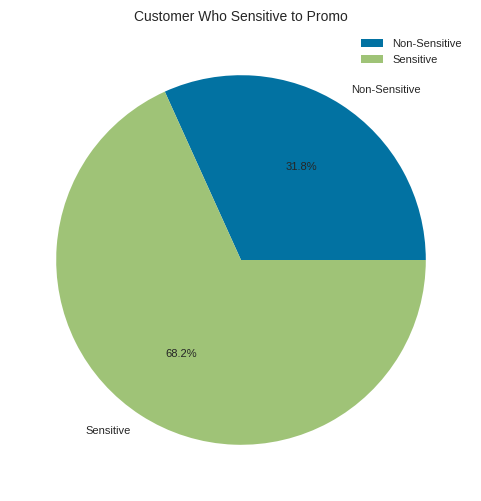

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(6,6))
# Then, we draw charts on the axis.
ax.pie(promo_chart['promo_sntv_ltm'], labels=promo_chart.index, autopct='%1.1f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Customer Who Sensitive to Promo')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

# D - EDA

## 1) Descriptive Statistics

### Numeric variable

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

In [ ]:
# Create variable numeric
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['avg_txn_amt_l6m','avg_txn_amt_ltm','avg_promo_txn_amt_l6m','avg_promo_txn_amt_ltm','txn_cnt_l6m','txn_cnt_ltm','promo_txn_cnt_l6m','promo_txn_cnt_ltm','last_txn_day','cnt_promo_l6m', 'cnt_promo_l12m','home_value','proxy_income','pct_income_retirement','mob','total_sales_promo_l6m','total_sales_l6m','r_sales_promo_l6m','r_sales_promo_ltm','total_sales_promo_ltm','total_sales_ltm']
numeric

['avg_txn_amt_l6m',
 'avg_txn_amt_ltm',
 'avg_promo_txn_amt_l6m',
 'avg_promo_txn_amt_ltm',
 'txn_cnt_l6m',
 'txn_cnt_ltm',
 'promo_txn_cnt_l6m',
 'promo_txn_cnt_ltm',
 'last_txn_day',
 'cnt_promo_l6m',
 'cnt_promo_l12m',
 'home_value',
 'proxy_income',
 'pct_income_retirement',
 'mob',
 'total_sales_promo_l6m',
 'total_sales_l6m',
 'r_sales_promo_l6m',
 'r_sales_promo_ltm',
 'total_sales_promo_ltm',
 'total_sales_ltm']

In [ ]:
desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,promo_txn_cnt_ltm,last_txn_day,cnt_promo_l6m,...,home_value,proxy_income,pct_income_retirement,mob,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m,r_sales_promo_ltm,total_sales_promo_ltm,total_sales_ltm
count,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,...,1.076580e+05,1.076580e+05,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00
mean,126.80,106.82,125.70,119.82,4.52,20.16,2.82,10.37,18.30,5.74,...,8.842408e+04,3.810552e+04,31.01,101.20,327.04,526.10,0.63,0.60,1212.23,2058.79
std,79.82,75.28,80.37,76.64,2.31,8.96,1.71,4.40,4.15,1.41,...,7.165626e+04,2.593463e+04,12.05,25.65,262.20,378.25,0.23,0.19,902.60,1555.23
min,11.50,17.30,3.20,3.20,1.00,3.00,1.00,1.00,2.00,0.00,...,0.000000e+00,0.000000e+00,0.00,21.00,3.20,35.00,0.02,0.02,9.60,262.50
25%,83.30,69.30,80.00,80.00,3.00,14.00,1.00,7.00,16.00,5.00,...,4.729700e+04,2.454200e+04,25.00,81.00,150.00,300.00,0.48,0.46,660.00,1210.00
50%,108.00,92.60,104.30,100.00,4.00,18.00,2.00,10.00,18.00,6.00,...,6.690700e+04,4.190400e+04,31.00,105.00,258.50,430.00,0.63,0.60,1000.00,1659.20
75%,150.00,123.80,150.00,150.00,6.00,24.00,4.00,12.00,21.00,6.00,...,9.823100e+04,5.363600e+04,38.00,125.00,405.00,641.30,0.79,0.75,1500.00,2430.40
max,2000.00,3010.00,2000.00,2500.00,18.00,127.00,10.00,46.00,28.00,21.00,...,6.000500e+05,2.000030e+05,100.00,570.00,5400.00,8500.00,1.00,1.00,25950.00,52751.00
kurtosis,46.90,277.45,40.15,78.19,0.82,6.10,0.68,1.62,2.14,6.45,...,1.123000e+01,2.300000e-01,1.35,1.95,22.70,30.59,-0.83,-0.67,62.97,124.58
skewness,4.39,10.51,4.13,5.21,0.91,1.87,1.03,1.06,-0.81,1.00,...,2.850000e+00,6.000000e-02,-0.25,-0.29,3.24,3.60,0.08,-0.04,4.41,6.58


**`Insights :`**

1. a. The average number of transactions in the last 6 months was 126.8, with a median of 108.
   
   b. The average number of transactions due to promos was 125.7 and a median of 104.3

2. a. Looking at the number of transactions over a lifetime, the average was 106.8 with a median of 92.6

   b. The average response to promos was 119.8 and a median of 100

3. a. The average number of promos received by each account in the last 6 months is 5.74 with a median of 6

   b. The average for 12 months is 14.4 with a median of 13

4. The average of last transaction days is 18.3 with a median of 18

5. The client's average monthly income is 38,141 euros with a median of 41,915 euros

6. The average book month for each client is 101.4 with a median of 105

### String variable

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

In [ ]:
objects = ['mcc','merchant_name','cust_value_group','mapp_active_group']
df_eda[objects].describe()

,mcc,merchant_name,cust_value_group,mapp_active_group
count,107658,107658,107658,107658
unique,1,1,5,3
top,5262-MARKETPLACES,REVOSHOP,E,X
freq,107658,107658,44537,100141


**`Insights :`**

- Most of the customer value status is `E`, i.e. The lowest profitable and creditworthy customer
- Most account activity statuses on bank mobile apps are `X`, i.e. High activity on mobile apps

### Date type variable

In [ ]:
df_eda['birth_date'].describe()

<ipython-input-137-8d92df24dc09>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['birth_date'].describe()


count                  107658
unique                   6761
top       1982-09-21 00:00:00
freq                       57
first     1957-07-17 00:00:00
last      2005-09-20 00:00:00
Name: birth_date, dtype: object

### Q1 - Total Revoshop Customers

In [ ]:
# How many RevoShop customers do we have in the data?
# Ans: 107,658 customers
df_eda['account_id'].nunique()

107658

In [ ]:
# Number unique of customer who transaction in each merchant name
df_eda.groupby(df_eda['merchant_name'], as_index=False)['account_id'].nunique()

,merchant_name,account_id
0,REVOSHOP,107658


**`Insight :`**

We have 107,658 unique users transacting on RevoShop

### Q2 - Customer Demographics

What are the customer demographics in the dataset?

Hint: Calculate customer age from their birth date and determine the age distribution. Also, analyze the gender and MOB (Month on Book) distribution of customers

**Age Distribution**

To calculate the age of a customer from their birth date to a specific date in Pandas, you can use the following steps:

- Specify the specific date to calculate age from

- Calculate the age of the customer by subtracting their birth date from the specific date, and then dividing by the number of days in a year

- Round the age to the nearest year using the round() function

In [ ]:
# Specify the specific date to calculate age from
# Notice that the date is assumed to be January 31, 2023
specific_date = pd.to_datetime('2023-01-31')

# Calculate the age of the customer
df_eda['age'] = ((specific_date - df_eda['birth_date']).dt.days / 365).apply(round)

# Convert datatype into int32
df_eda['age'] = df_eda['age'].astype('int32')

df_eda[['birth_date','age']].head()

,birth_date,age
0,1975-12-17,47
1,1991-12-27,31
2,1970-03-22,53
3,1983-11-26,39
4,1989-10-21,33


In [ ]:
# Calculate the max and min of the age
max_age = df_eda['age'].max() #66
print(max_age)
min_age = df_eda['age'].min() #17
print(min_age)

66
17


In [ ]:
# Create the age_group using pd.cut()
# Let's suppose the age group is: 17-20, 21-30, 31-40, 41-50, 51-60, >60
df_eda['age_group'] = pd.cut(df_eda['age'], [min_age, 20, 30, 40, 50, 60,max_age])
df_eda.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age,age_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,400.0,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0,47,"(40, 50]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,280.0,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0,31,"(30, 40]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,800.0,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0,53,"(50, 60]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1457.4,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0,39,"(30, 40]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,390.0,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0,33,"(30, 40]"


In [ ]:
# Create new dataframe before visualize
age_hist = pd.DataFrame(df_eda['age_group'].value_counts().sort_index())
age_hist.index = ['17-20', '21-30', '30-40', '40-50', '50-60', '>60']
age_hist

,age_group
17-20,7
21-30,3706
30-40,50724
40-50,48637
50-60,4533
>60,50


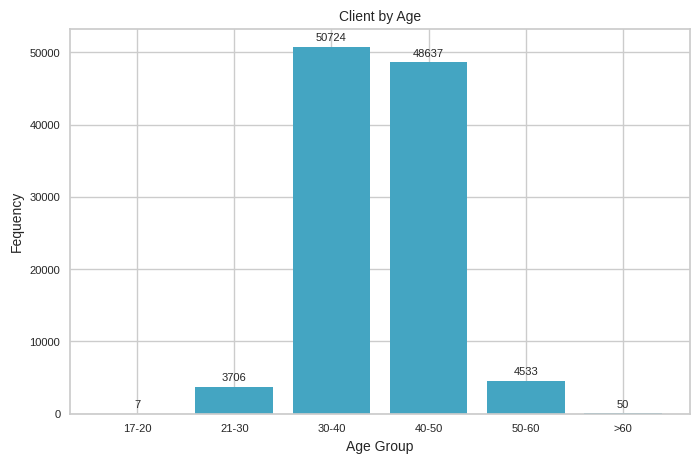

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.bar(age_hist.index, age_hist['age_group'], color = "#44a5c2")

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Client by Age')
ax.set_xlabel('Age Group')
ax.set_ylabel('Fequency')

# Then we end the chart by showing the figure
fig.show()

**`Insights :`**

- The largest age group is 30 - 40s
- The lowest age group is 17 - 20s

----

**Gender distribution of customers**

- 1 = Female
- 0 = Male

In [ ]:
revo_gender = pd.DataFrame(df_eda['gender'].value_counts()).sort_index()
revo_gender.index = ['Male', 'Female']
display(revo_gender)

,gender
Male,44623
Female,63035


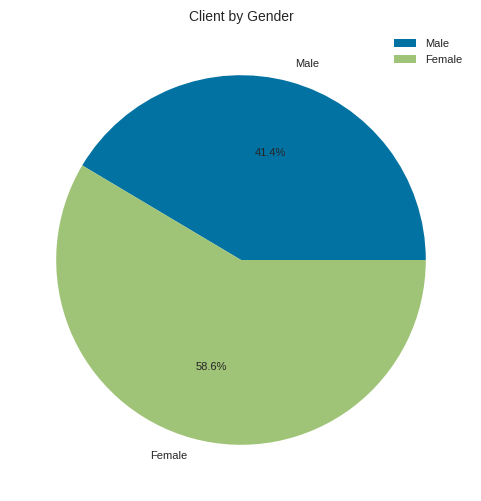

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(6,6))
# Then, we draw charts on the axis.
ax.pie(revo_gender['gender'], labels=revo_gender.index, autopct='%1.1f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Client by Gender')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

**`Insight :`**

- Almost 60% of customers are female

----

**MOB distribution of customers**

In [ ]:
# mob distribution : Number of months has the customer been a customer
min_df = df_eda['mob'].min()
max_df = df_eda['mob'].max()
print('Minimum of month:',min_df)
print('Maximum of month:',max_df)

Minimum of month: 21.0
Maximum of month: 570.0


In [ ]:
# Create the age_group using pd.cut()
# Let's suppose the age group is: 21-50, 51-100, 101-150, 151-200, >200
df_eda['mob_group'] = pd.cut(df_eda['mob'], [min_df, 50, 100, 150, 200, max_df])
df_eda.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,total_sales_l6m,r_sales_promo_l6m,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age,age_group,mob_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0,47,"(40, 50]","(100.0, 150.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0,31,"(30, 40]","(100.0, 150.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0,53,"(50, 60]","(50.0, 100.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0,39,"(30, 40]","(50.0, 100.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0,33,"(30, 40]","(100.0, 150.0]"


In [ ]:
# Create new dataframe before visualize
mob_hist = pd.DataFrame(df_eda['mob_group'].value_counts().sort_index())
mob_hist.index = ['< 5 years','5-10 years', '10-12 years', '12-15 years', '>15 years']
mob_hist

,mob_group
< 5 years,3154
5-10 years,43020
10-12 years,61181
12-15 years,240
>15 years,62


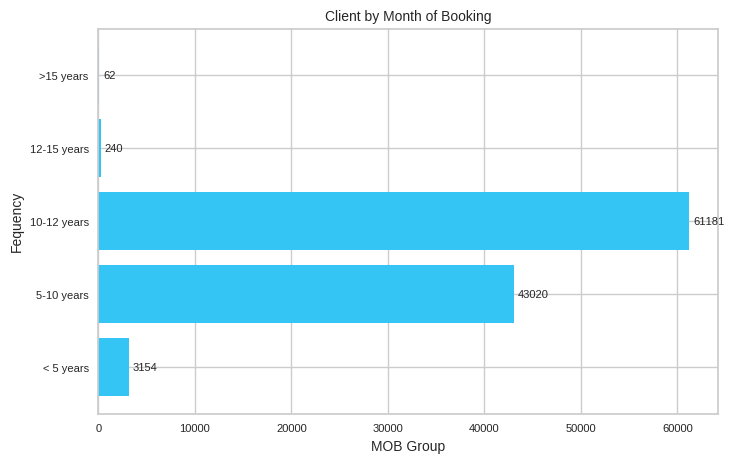

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.barh(mob_hist.index, mob_hist['mob_group'], color = "#34c5f4")

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Client by Month of Booking')
ax.set_xlabel('MOB Group')
ax.set_ylabel('Fequency')

# Then we end the chart by showing the figure
fig.show()

In [ ]:
df_eda['mob_group'].value_counts(normalize=True)

(100.0, 150.0]    0.568296
(50.0, 100.0]     0.399602
(21.0, 50.0]      0.029297
(150.0, 200.0]    0.002229
(200.0, 570.0]    0.000576
Name: mob_group, dtype: float64

`57% as many 61,181` of customers are groups with an account opening period of 100 -150 months

### Q3 - Total sales over the past 6 months?
How much total sales have been generated in RevoShop over the past 6 months?

Hint : Total Sales can be calculated by multiplying the average transaction amount by the number of transactions

In [ ]:
df_eda.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,total_sales_l6m,r_sales_promo_l6m,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age,age_group,mob_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0,47,"(40, 50]","(100.0, 150.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0,31,"(30, 40]","(100.0, 150.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0,53,"(50, 60]","(50.0, 100.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0,39,"(30, 40]","(50.0, 100.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0,33,"(30, 40]","(100.0, 150.0]"


In [ ]:
df_eda['total_sales_l6m'].sum()

56639218.9

Total sales for the last 6 months were 56,639,218.9 euros

### Q4 - Total Sales in response to the promo in the last 6 months

How many sales were made in response to the promo in the last 6 months?

Hint : Use columns that indicate the average promo transactions and the number of promo transactions

In [ ]:
df_eda['total_sales_promo_l6m'].sum()

35208915.89999999

Total sales attributed to promo for the last 6 months were 35,208,915.9 euros

### Q5 - % of Total Sales in response to promo

What percentage of total sales at RevoShop is attributed to the promo?

Hint : Divide the result from part D divided by the result from part C for the past 6 months. Repeat the calculation for lifetime sales and compare the two results

In [ ]:
# For 6 months
round(df_eda['total_sales_promo_l6m'].sum() / df_eda['total_sales_l6m'].sum() * 100)

62

In [ ]:
# Fot lifetime
round(df_eda['total_sales_promo_ltm'].sum() / df_eda['total_sales_ltm'].sum() * 100)

59

### Q6 - Avg of #Transaction per Customer

What is the average number of transactions per customer in their lifetime and over the past 6 months?

Hint : Add up the transaction counts for the past 6 months and divide by the total number of customers. Repeat the same process for lifetime transactions and compare the results

In [ ]:
# Last 6 months
print('For the past 6 months: ',df_eda['txn_cnt_l6m'].sum() / df_eda['account_id'].nunique())

# Lifetime
print('For the lifetime:', df_eda['txn_cnt_ltm'].sum() / df_eda['account_id'].nunique())

For the past 6 months:  4.524484943060432
For the lifetime: 20.158074643779376


In [ ]:
# Quick ways
print('For the past 6 months:', df_eda['txn_cnt_l6m'].mean())
print('For the Lifetime:', df_eda['txn_cnt_ltm'].mean())

For the past 6 months: 4.524484943060432
For the Lifetime: 20.158074643779376


Performance of average transactions per customer has been **better over the lifetime** compared to the past 6 months

### Q7 - Total Cost of Promotion Over past 6 months

What is the total cost of the promotion over the past 6 months?

Hint : the total promo cost can be calculated as the number of promo transactions multiplied by 1,5 euro per transactions

In [ ]:
# total cost of the promotion over the past 6 months
total_cost = df_eda['promo_txn_cnt_l6m'].sum() * 1.5
total_cost

456100.5

The total cost of the promotion over the past 6 months were 456,100.5 euros

### Q8 - Total Revenue in the past 6 months
What is the total revenue generated by the promo in the past 6 months?

Hint : Total revenue can be calculated by multiplying the total sales by 2.4%

In [ ]:
total_revenue = df_eda['total_sales_promo_l6m'].sum()* 0.024
total_revenue

845013.9815999998

The total revenue generated by the promo in the past 6 months were 845,103 euros

In [ ]:
total_revenue / total_cost

1.852692513163217

Hence we can see the return of this promo is 844929/461355 = 1.8x

### Q9 - #Customer who are sensitive to promo
How many customers are considered promo-sensitive?

Hint : A customer is promo-sensitive if 50% of their total sales in RevoShop are attributed to the promo

In [ ]:
print('For 6 months:\n', df_eda['promo_sntv_l6m'].value_counts())
print('\n')
print('For Lifetime:\n', df_eda['promo_sntv_ltm'].value_counts())

For 6 months:
 1.0    72091
0.0    35567
Name: promo_sntv_l6m, dtype: int64


For Lifetime:
 1.0    73461
0.0    34197
Name: promo_sntv_ltm, dtype: int64


In [ ]:
df_eda[['promo_sntv_ltm','promo_sntv_l6m']].value_counts(normalize=True)

promo_sntv_ltm  promo_sntv_l6m
1.0             1.0               0.490544
                0.0               0.191811
0.0             1.0               0.179086
                0.0               0.138559
dtype: float64

----

In [ ]:
df_eda.groupby(['promo_channel','promo_sntv_ltm','promo_sntv_l6m'], as_index=False)['total_sales_promo_l6m','total_sales_l6m'].sum()

<ipython-input-164-425a19d9406a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eda.groupby(['promo_channel','promo_sntv_ltm','promo_sntv_l6m'], as_index=False)['total_sales_promo_l6m','total_sales_l6m'].sum()


,promo_channel,promo_sntv_ltm,promo_sntv_l6m,total_sales_promo_l6m,total_sales_l6m
0,0.0,0.0,0.0,1957829.4,5472525.4
1,0.0,0.0,1.0,4818074.0,6780819.4
2,0.0,1.0,0.0,2775104.0,7078486.3
3,0.0,1.0,1.0,15153018.2,20393808.8
4,1.0,0.0,0.0,864465.7,2423858.9
5,1.0,0.0,1.0,2136329.4,2989735.6
6,1.0,1.0,0.0,1152394.3,2944023.5
7,1.0,1.0,1.0,6351700.9,8555961.0


In [ ]:
# Promo Channel vs Total Sales
promo_group = df_eda.groupby('promo_channel', as_index=False)['total_sales_promo_l6m','total_sales_l6m'].sum()
promo_group

<ipython-input-165-7bc5a7cc0f65>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promo_group = df_eda.groupby('promo_channel', as_index=False)['total_sales_promo_l6m','total_sales_l6m'].sum()


,promo_channel,total_sales_promo_l6m,total_sales_l6m
0,0.0,24704025.6,39725639.9
1,1.0,10504890.3,16913579.0


In [ ]:
# Sales generated to promo via SMS
25041989.9 / (41293017.4 + 17574617.3)

0.4253948715218211

In [ ]:
# Sales generated to promo via EMAIL
10649372.1 / (41293017.4 + 17574617.3)

0.18090368594340683

<ipython-input-168-ceb1ef04b2ef>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promo_group = df_eda.groupby('promo_channel', as_index=False)['total_sales_promo_l6m','total_sales_l6m'].sum().reset_index()


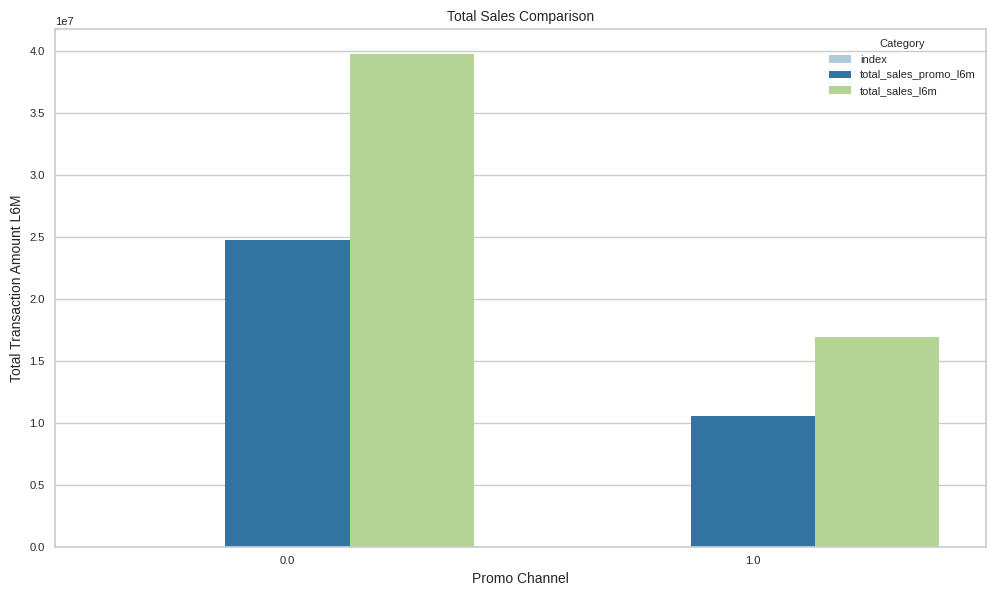

In [ ]:
# 0: sms , 1: email
promo_group = df_eda.groupby('promo_channel', as_index=False)['total_sales_promo_l6m','total_sales_l6m'].sum().reset_index()

plt.figure(figsize=(10, 6))

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

melted_data = pd.melt(promo_group, id_vars='promo_channel', var_name='Category', value_name='Total Amount')

sns.barplot(x="promo_channel", y="Total Amount", hue="Category", data=melted_data, palette='Paired')

plt.xlabel('Promo Channel')
plt.ylabel('Total Transaction Amount L6M')
plt.title("Total Sales Comparison")

# Show the legend
plt.legend(title='Category')

plt.tight_layout()
plt.show()

## 2) Trends

### Q1 -  Active vs Inactive Customers
Is there any difference in transaction behaviour and promo sensitivity between active and inactive customers in the past 6 months?

Hint : Compare the **number of customers, promo-sensitive customers, average transaction amount, and average transaction count** per customer for each customer group

- X: High activity in mobile app
- Y: Average activity
- Z: Low activity

In [ ]:
df_eda.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,total_sales_l6m,r_sales_promo_l6m,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age,age_group,mob_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0,47,"(40, 50]","(100.0, 150.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0,31,"(30, 40]","(100.0, 150.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0,53,"(50, 60]","(50.0, 100.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0,39,"(30, 40]","(50.0, 100.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0,33,"(30, 40]","(100.0, 150.0]"


In [ ]:
# Create new variable
txn_behv = df_eda[['mapp_active_group','account_id','avg_txn_amt_l6m','avg_txn_amt_ltm','txn_cnt_l6m','txn_cnt_ltm','promo_sntv_l6m','promo_sntv_ltm']]
txn_behv

,mapp_active_group,account_id,avg_txn_amt_l6m,avg_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_sntv_l6m,promo_sntv_ltm
0,X,100000004,216.0,201.0,5.0,21.0,0.0,0.0
1,X,100000008,143.3,114.1,3.0,22.0,1.0,1.0
2,X,100000012,263.3,242.7,4.0,12.0,1.0,0.0
3,X,100000014,235.6,210.0,8.0,27.0,1.0,1.0
4,X,100000015,98.0,77.5,5.0,44.0,1.0,1.0
...,...,...,...,...,...,...,...,...
112628,X,101059832,100.0,84.2,2.0,12.0,1.0,0.0
112629,Y,101059843,120.0,113.4,3.0,22.0,0.0,0.0
112630,Y,101059857,52.9,36.8,7.0,28.0,0.0,1.0
112631,Y,101059860,195.0,147.3,3.0,23.0,1.0,1.0


In [ ]:
txn_behv['mapp_active_group'] = txn_behv['mapp_active_group'].replace({'X':'active','Y':'mid','Z':'inactive'})
txn_behv['mapp_active_group'].value_counts()

<ipython-input-171-a44a80be9e16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txn_behv['mapp_active_group'] = txn_behv['mapp_active_group'].replace({'X':'active','Y':'mid','Z':'inactive'})


active      100141
mid           7036
inactive       481
Name: mapp_active_group, dtype: int64

In [ ]:
# Group the data by customer group
txn_behv_grouped = txn_behv.groupby(['mapp_active_group']).agg({
    'account_id': 'nunique',
    'avg_txn_amt_l6m' :'mean',
    'avg_txn_amt_ltm' :'mean',
    'txn_cnt_l6m':'mean',
    'txn_cnt_ltm':'mean',
    'promo_sntv_l6m':'sum',
    'promo_sntv_ltm':'sum'
})
txn_behv_grouped

,account_id,avg_txn_amt_l6m,avg_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_sntv_l6m,promo_sntv_ltm
mapp_active_group,,,,,,,
active,100141,126.648324,106.315616,4.540338,20.197482,67097.0,68384.0
inactive,481,139.574636,176.912058,5.197505,18.449064,270.0,166.0
mid,7036,128.039298,109.198209,4.252843,19.714042,4724.0,4911.0


In [ ]:
txn_behv_grouped = txn_behv_grouped.reset_index('mapp_active_group')
txn_behv_grouped

,mapp_active_group,account_id,avg_txn_amt_l6m,avg_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_sntv_l6m,promo_sntv_ltm
0,active,100141,126.648324,106.315616,4.540338,20.197482,67097.0,68384.0
1,inactive,481,139.574636,176.912058,5.197505,18.449064,270.0,166.0
2,mid,7036,128.039298,109.198209,4.252843,19.714042,4724.0,4911.0


In [ ]:
139.574636 / (126.648324+139.574636+128.039298)

0.35401470256886725

In [ ]:
5.197505 / (4.540338+5.197505+4.252843)

0.3714975091285731

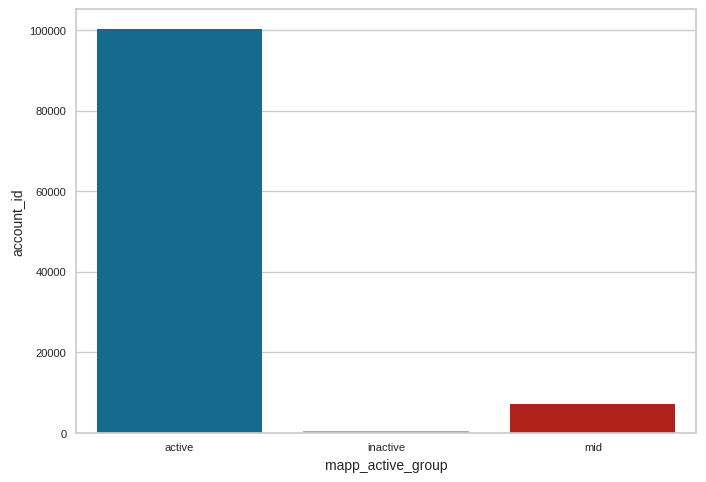

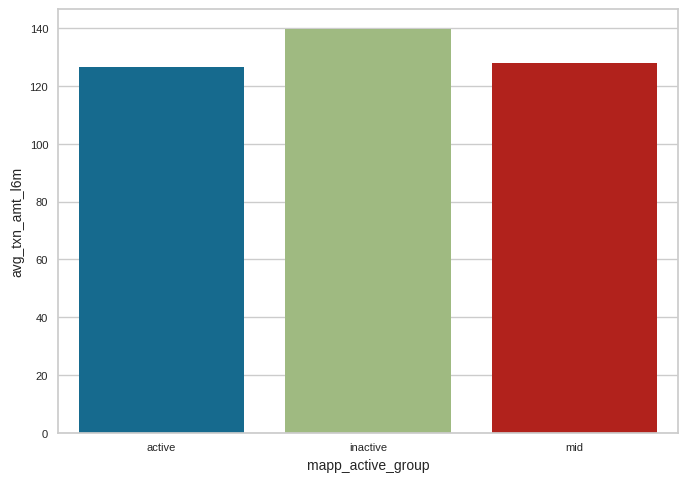

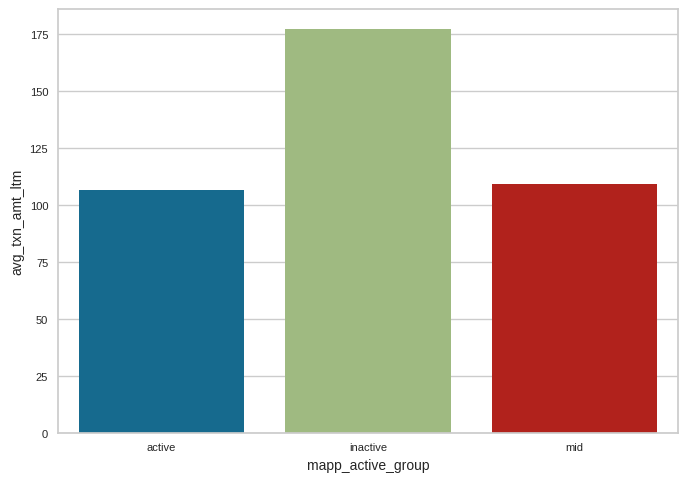

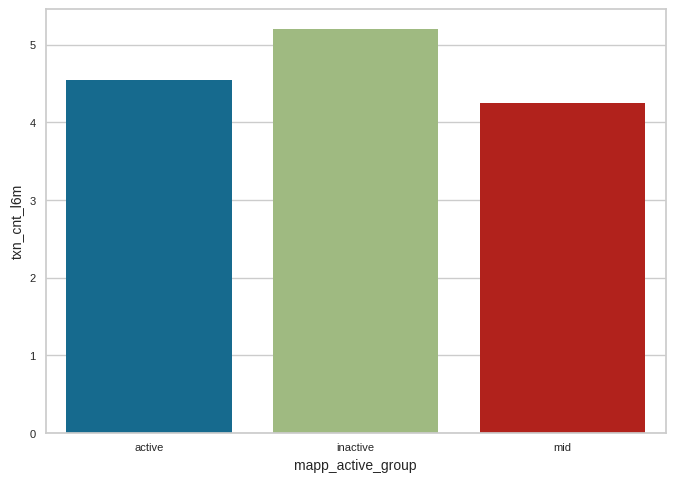

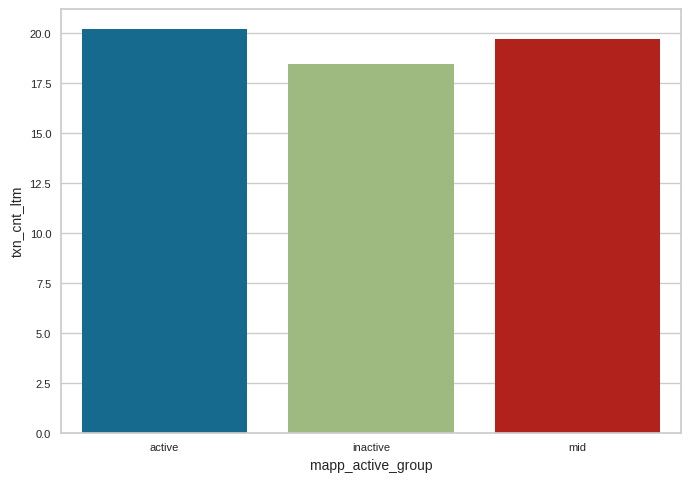

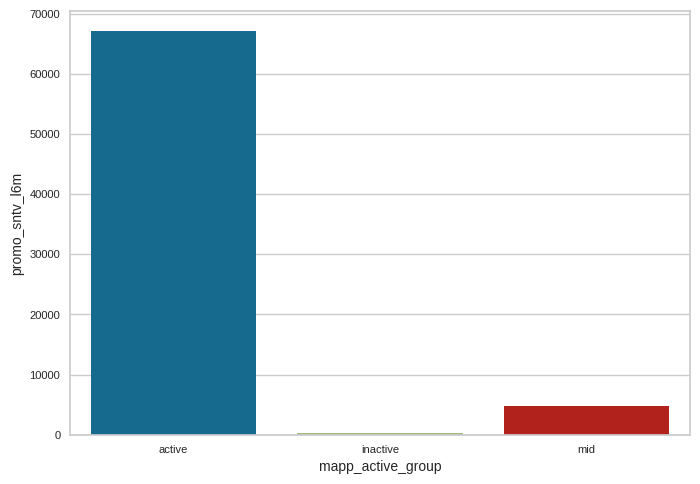

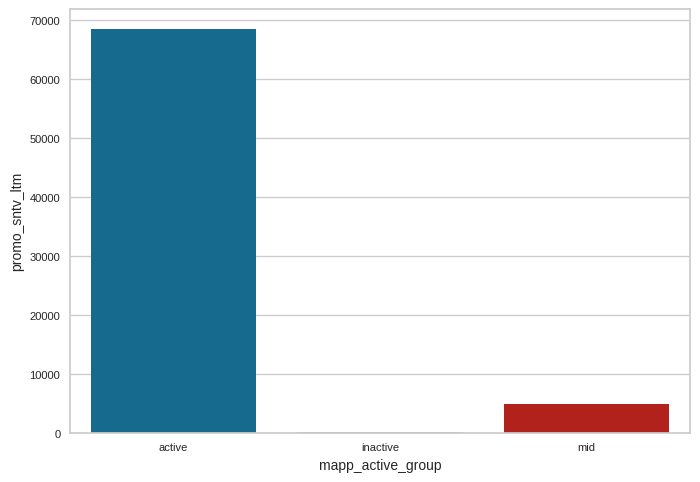

In [ ]:
list_data = ['account_id','avg_txn_amt_l6m','avg_txn_amt_ltm','txn_cnt_l6m','txn_cnt_ltm','promo_sntv_l6m','promo_sntv_ltm']

for i in list_data:
    sns.barplot(x='mapp_active_group',y=str(i),data=txn_behv_grouped)
    plt.show()

**`Insight :`**

1. active :
  - have highest number of customer
  - have lowest in in average transaction amount both in past 6 months and lifetime
  - have the highest in avg transaction due to promo in lifetime
   - have largest proportion of promo sensitive both in past 6 months and lifetime

2. inactive :
  - have lowest number of customer
  - have highest in average transaction amount both in past 6 months and lifetime
  - have the highest in avg transaction number due to promo in past 6 months
   - have lowest proportion of promo sensitive both in past 6 months and lifetime


### Q2 - High Value vs Low-Value
Is there any difference in transaction behaviour and promo sensitivity between High-value and lower-value customers in the past 6 months?

Hint : Compare the **number of customers, promo-sensitive customers, average transaction amount, and average transaction count** per customer for each customer group

In [ ]:
# Create new variable
value_group = df_eda[['cust_value_group','account_id','avg_txn_amt_l6m','avg_txn_amt_ltm','txn_cnt_l6m','txn_cnt_ltm','promo_sntv_l6m','promo_sntv_ltm']]
value_group

,cust_value_group,account_id,avg_txn_amt_l6m,avg_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_sntv_l6m,promo_sntv_ltm
0,A,100000004,216.0,201.0,5.0,21.0,0.0,0.0
1,A,100000008,143.3,114.1,3.0,22.0,1.0,1.0
2,A,100000012,263.3,242.7,4.0,12.0,1.0,0.0
3,A,100000014,235.6,210.0,8.0,27.0,1.0,1.0
4,A,100000015,98.0,77.5,5.0,44.0,1.0,1.0
...,...,...,...,...,...,...,...,...
112628,E,101059832,100.0,84.2,2.0,12.0,1.0,0.0
112629,E,101059843,120.0,113.4,3.0,22.0,0.0,0.0
112630,E,101059857,52.9,36.8,7.0,28.0,0.0,1.0
112631,E,101059860,195.0,147.3,3.0,23.0,1.0,1.0


In [ ]:
value_group['cust_value_group'] = value_group['cust_value_group'].replace({
    'A': 'A: Best', 'B': 'B: Good', 'C': 'C: Average', 'D': 'D: Low', 'E': 'E: Worst'})
value_group['cust_value_group'].value_counts()

<ipython-input-178-42cbb58d4f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_group['cust_value_group'] = value_group['cust_value_group'].replace({


E: Worst      44537
C: Average    17734
B: Good       16997
A: Best       16389
D: Low        12001
Name: cust_value_group, dtype: int64

In [ ]:
# lambda x: sum(x) / len(x.unique()) # calculate avg txn amount for each group

In [ ]:
# Group the data by value group
value_group_grouped = value_group.groupby(['cust_value_group']).agg({
    'account_id': 'nunique',
    'avg_txn_amt_l6m':'mean',
    'avg_txn_amt_ltm':'mean',
    'txn_cnt_l6m':'mean',
    'txn_cnt_ltm':'mean',
    'promo_sntv_l6m':'sum',
    'promo_sntv_ltm':'sum'
})
value_group_grouped

,account_id,avg_txn_amt_l6m,avg_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_sntv_l6m,promo_sntv_ltm
cust_value_group,,,,,,,
A: Best,16389,144.849143,125.968863,4.225212,20.117030,11522.0,10502.0
B: Good,16997,130.904477,111.048526,4.355651,19.421427,11347.0,11690.0
C: Average,17734,125.634431,105.225426,4.533044,19.839856,11897.0,12173.0
D: Low,12001,126.449679,104.977810,4.593951,20.267144,8143.0,8125.0
E: Worst,44537,119.142962,99.289658,4.676920,20.551631,29182.0,30971.0


In [ ]:
value_group['cust_value_group'].value_counts(normalize=True)

E: Worst      0.413690
C: Average    0.164725
B: Good       0.157880
A: Best       0.152232
D: Low        0.111473
Name: cust_value_group, dtype: float64

In [ ]:
29182/(11522+11347+11897+8143+29182)

0.40479394099124716

In [ ]:
144.849143	/ (144.849143	+130.904477+ 125.634431	+126.449679+119.142962)

0.22388480025923246

In [ ]:
4.67692 / (4.67692+4.225212+4.355651+4.533044+4.593951)

0.20893305263067607

In [ ]:
value_group_grouped = value_group_grouped.reset_index('cust_value_group')
value_group_grouped

,cust_value_group,account_id,avg_txn_amt_l6m,avg_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_sntv_l6m,promo_sntv_ltm
0,A: Best,16389,144.849143,125.968863,4.225212,20.117030,11522.0,10502.0
1,B: Good,16997,130.904477,111.048526,4.355651,19.421427,11347.0,11690.0
2,C: Average,17734,125.634431,105.225426,4.533044,19.839856,11897.0,12173.0
3,D: Low,12001,126.449679,104.977810,4.593951,20.267144,8143.0,8125.0
4,E: Worst,44537,119.142962,99.289658,4.676920,20.551631,29182.0,30971.0


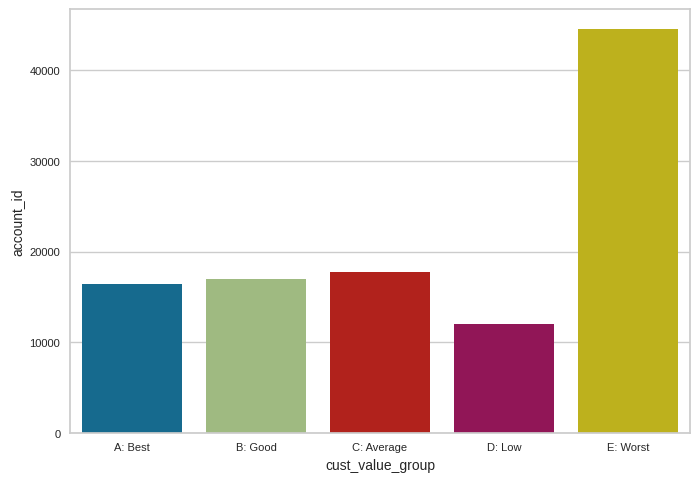

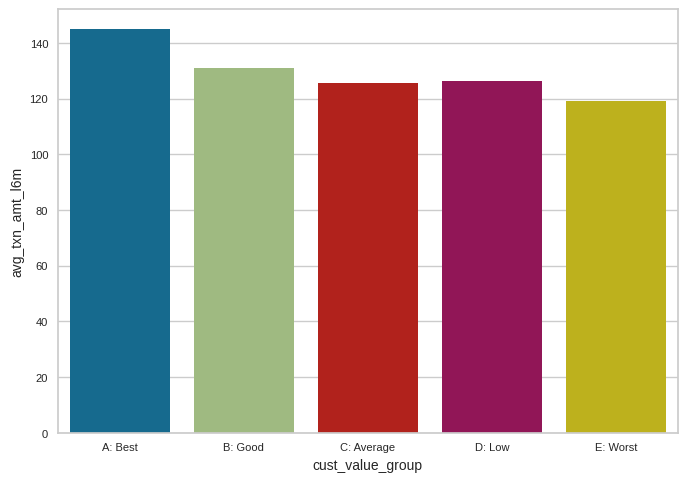

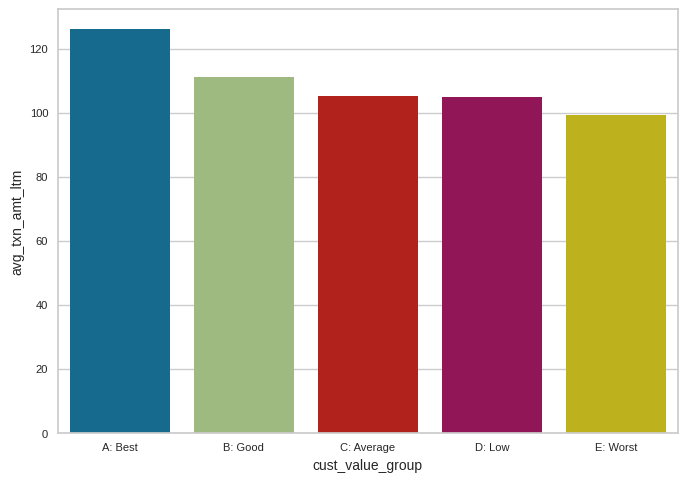

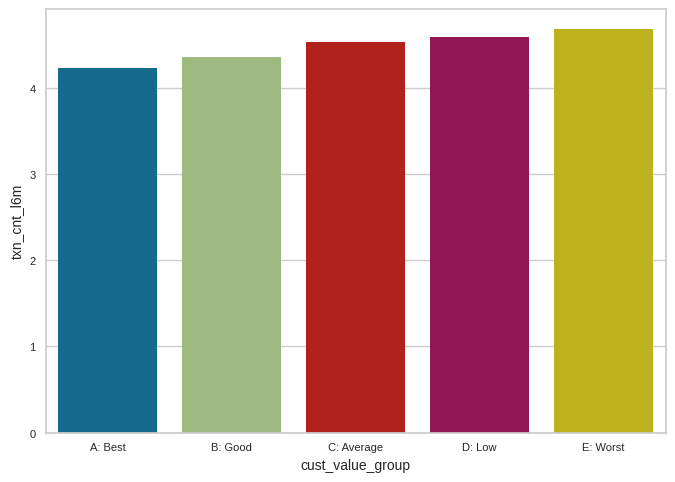

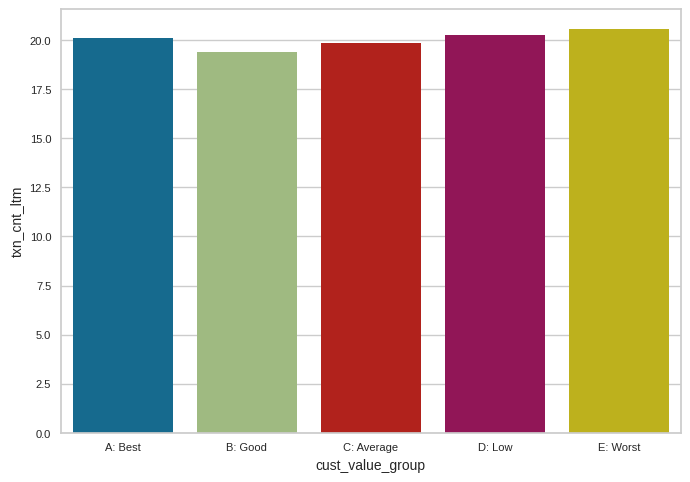

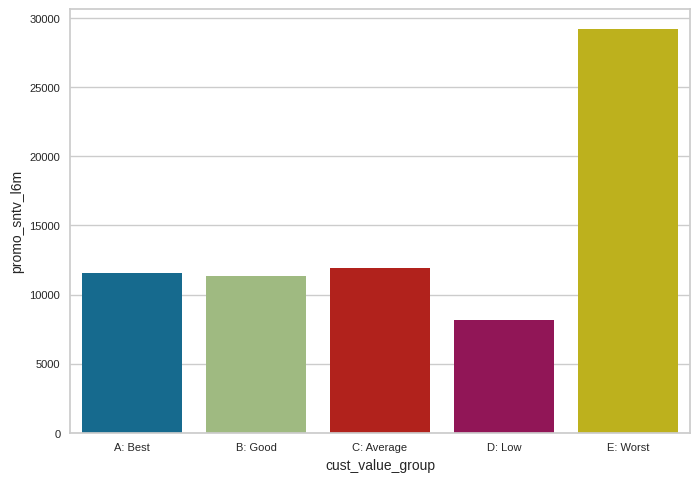

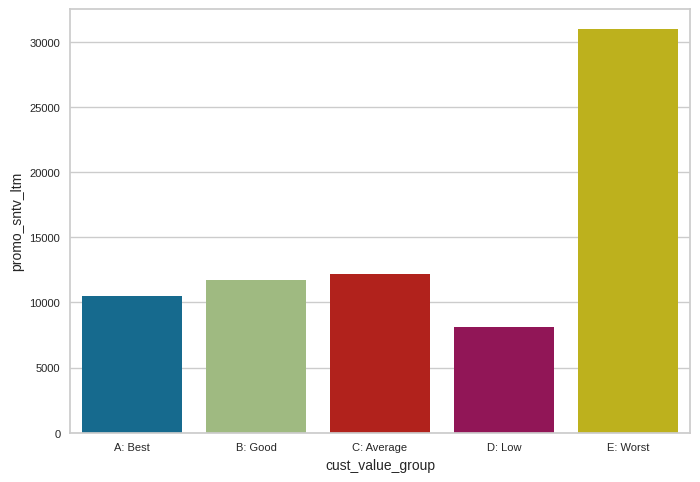

In [ ]:
list_data1 = ['account_id','avg_txn_amt_l6m','avg_txn_amt_ltm','txn_cnt_l6m','txn_cnt_ltm','promo_sntv_l6m','promo_sntv_ltm']
for i in list_data1:
    sns.barplot(x='cust_value_group',y=str(i),data=value_group_grouped)
    plt.show()

`Insight :`

1. A - Best/High-Value :
  - have lower in number of customer than E
  - However, have the highest average transaction amount
  - have the lowest in average transaction freq in past 6 months
  - have smaller proportion of promo sensitive than E

2. E - Worst/Low-Value :
  - have the highest number of customer
  - In contrary, they have the lowest average transaction amount
  - have highest in average transaction freq both in past 6 months and lifetime
  - have the largest proportion of promo sensitive


### Q3 - Promo Channel vs Sales Performance
Is there a relationship between increasing the number of email and SMS messages and improved sales performance?

Hint : Group the data by promo commmunication count calculate the average sales per customers in each group

Apakah ada hubungan antara peningkatan jumlah email dan pesan SMS dengan peningkatan kinerja penjualan?

In [ ]:
df_eda.head()

,account_id,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,txn_cnt_l6m,txn_cnt_ltm,promo_txn_cnt_l6m,...,total_sales_l6m,r_sales_promo_l6m,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age,age_group,mob_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0,47,"(40, 50]","(100.0, 150.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0,31,"(30, 40]","(100.0, 150.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0,53,"(50, 60]","(50.0, 100.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0,39,"(30, 40]","(50.0, 100.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0,33,"(30, 40]","(100.0, 150.0]"


In [ ]:
df_eda['cnt_promo_l6m'].value_counts().sort_index()

0.0        56
1.0       306
2.0      1223
3.0      2932
4.0     10458
5.0     25484
6.0     47795
7.0     13555
8.0      2209
9.0      1124
10.0      942
11.0     1111
12.0      337
13.0       56
14.0        7
15.0        4
16.0       26
17.0       14
18.0        5
19.0        5
20.0        6
21.0        3
Name: cnt_promo_l6m, dtype: int64

In [ ]:
df_eda.groupby('promo_channel',as_index=False)[['promo_channel','cnt_promo_l6m']].value_counts().sort_index()

,promo_channel,cnt_promo_l6m,count
0,0.0,6.0,33348
1,0.0,5.0,17942
2,0.0,7.0,9584
3,0.0,4.0,7296
4,0.0,3.0,2006
5,0.0,8.0,1524
6,0.0,2.0,857
7,0.0,9.0,773
8,0.0,11.0,768
9,0.0,10.0,649


In [ ]:
df_eda.groupby('cnt_promo_l6m').agg({
    'account_id': 'nunique',
    'total_sales_l6m':'mean',
    'total_sales_promo_l6m':'mean'
})

,account_id,total_sales_l6m,total_sales_promo_l6m
cnt_promo_l6m,,,
0.0,56,271.858929,133.925000
1.0,306,381.355882,241.678431
2.0,1223,318.512183,211.239248
3.0,2932,321.238677,196.057844
4.0,10458,362.937397,222.069038
5.0,25484,425.779634,263.673925
6.0,47795,570.854960,348.944737
7.0,13555,679.289723,450.262221
8.0,2209,583.844681,379.678633


It seems like the more SMS/Email sent, the more sales per customer we got!

<Axes: xlabel='cnt_promo_l6m'>

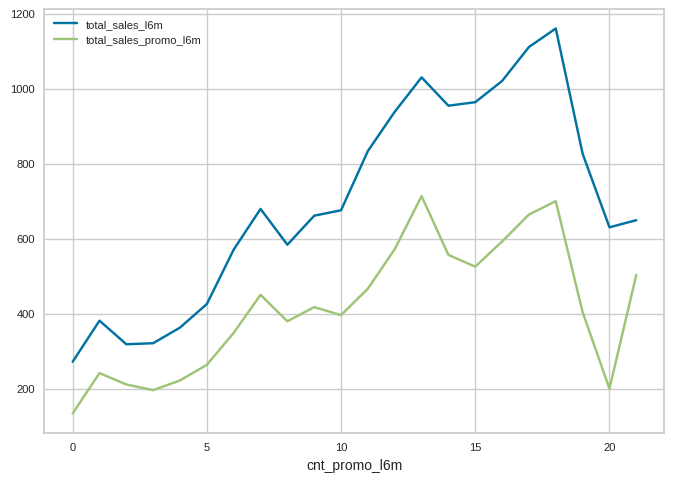

In [ ]:
# Line Chart
df_eda.groupby('cnt_promo_l6m')[['total_sales_l6m','total_sales_promo_l6m']].mean().plot(kind='line')

The line shows an upward trend. It indicates that there is a positive correlation between promo channel and sales performance in past 6 months. This means that as the number of promo communications increases, the average sales per customer also increases

# K-Means Clustering

We would like to find the **segments of customers** based on their promo sensitivity and potential to generate revenue
Therefore, our choice of variables focused on there two aspects of the issue.

**Import Library**

In [ ]:
# Read & download dataset
import pandas as pd               # Library used for working with data sets and perform data analysis.
import numpy as np                # To perform mathematical operasion and statistics
import shutil                     # To extract files in zip format
import gdown                      # To download files from Google Drive

# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

## Data Preparation

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   account_id             107658 non-null  int64         
 1   mcc                    107658 non-null  object        
 2   merchant_name          107658 non-null  object        
 3   avg_txn_amt_l6m        107658 non-null  float64       
 4   avg_txn_amt_ltm        107658 non-null  float64       
 5   avg_promo_txn_amt_l6m  107658 non-null  float64       
 6   avg_promo_txn_amt_ltm  107658 non-null  float64       
 7   txn_cnt_l6m            107658 non-null  float64       
 8   txn_cnt_ltm            107658 non-null  float64       
 9   promo_txn_cnt_l6m      107658 non-null  float64       
 10  promo_txn_cnt_ltm      107658 non-null  float64       
 11  last_txn_day           107658 non-null  float64       
 12  cnt_promo_l6m          107658 non-null  floa

As we know that K-means is performed only on the **numerical data** so we choose the numerical columns for our analysis.

Here we want to create our cluster using these feature :

- Income
- Total transaction amount (sales) over past 6 months

 'account_id' in no way helps us in our clustering analysis and can either be dropped or in this case assigned to as the index

In [ ]:
df_cluster = df_eda.copy()

In [ ]:
kmeans = df_cluster[['account_id','last_txn_day','total_sales_promo_l6m','total_sales_l6m','r_sales_promo_l6m']]
kmeans = kmeans.set_index(['account_id'])
kmeans

,last_txn_day,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m
account_id,,,,
100000004,15.0,400.0,1080.0,0.370370
100000008,20.0,280.0,429.9,0.651314
100000012,16.0,800.0,1053.2,0.759590
100000014,20.0,1457.4,1884.8,0.773239
100000015,25.0,390.0,490.0,0.795918
...,...,...,...,...
101059832,4.0,200.0,200.0,1.000000
101059843,8.0,120.0,360.0,0.333333
101059857,19.0,140.1,370.3,0.378342


In [ ]:
kmeans.describe()

,last_txn_day,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m
count,107658.000000,107658.000000,107658.000000,107658.000000
mean,18.302885,327.044120,526.103206,0.634885
std,4.149287,262.203196,378.254882,0.229939
min,2.000000,3.200000,35.000000,0.015756
25%,16.000000,150.000000,300.000000,0.476190
50%,18.000000,258.500000,430.000000,0.626492
75%,21.000000,405.000000,641.300000,0.788182
max,28.000000,5400.000000,8500.000000,1.000000


K-Means also tends to works best when the numbers on the same number scale, so let's divide all monetary variables by 1,000

In [ ]:
kmeans[['last_txn_day','total_sales_promo_l6m','total_sales_l6m','r_sales_promo_l6m']] = kmeans[['last_txn_day','total_sales_promo_l6m','total_sales_l6m','r_sales_promo_l6m']] / 1000
kmeans

,last_txn_day,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m
account_id,,,,
100000004,0.015,0.4000,1.0800,0.000370
100000008,0.020,0.2800,0.4299,0.000651
100000012,0.016,0.8000,1.0532,0.000760
100000014,0.020,1.4574,1.8848,0.000773
100000015,0.025,0.3900,0.4900,0.000796
...,...,...,...,...
101059832,0.004,0.2000,0.2000,0.001000
101059843,0.008,0.1200,0.3600,0.000333
101059857,0.019,0.1401,0.3703,0.000378


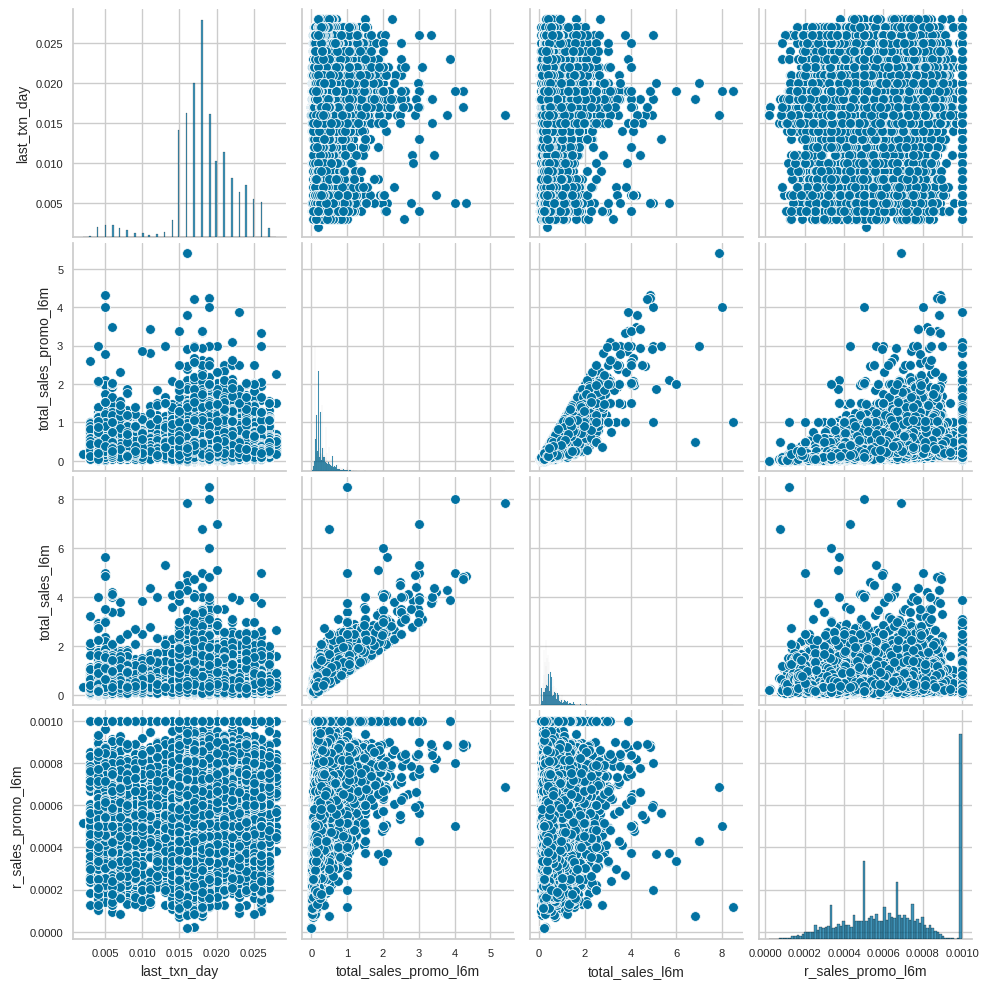

In [ ]:
sns.pairplot(kmeans)

## Determine n_cluster

For k-means clustering, we need to determine n_clusters, number of cluster we want to create. The value of k that is the number of pre-defined clusters.

To check that, we need to try different n_clusters and confirm using 2 tools:
- Elbow Method
- Silhouette Analysis

### Elbow Method

- Depends on distortion value (distortion is measure of how far each points to the center of cluster; the smallest the better)

- But usually we don't want to have too big number of cluster (not very actionable)

- Therefore we aim to choose the "elbow" -- number of cluster with low enough distortion value, but small count of cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

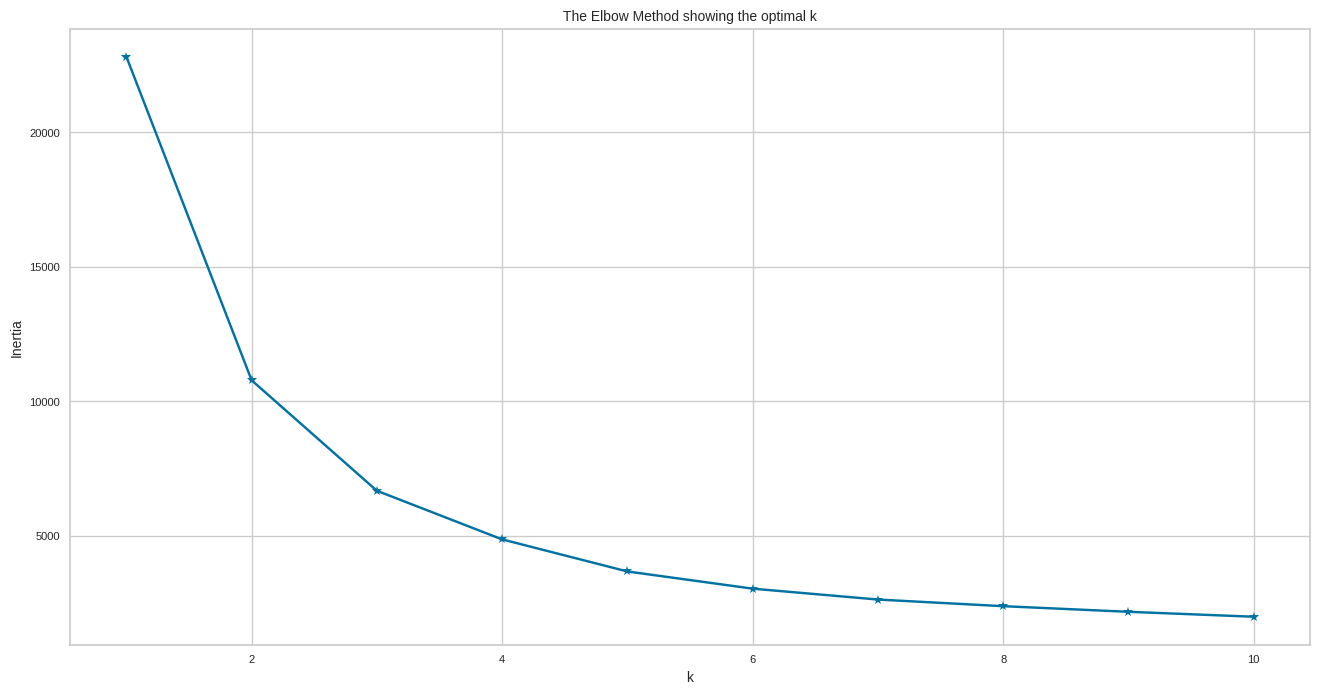

[22806.547739930167, 10774.64900700809, 6667.433889520735, 4859.507977773015, 3666.9373170252547, 3027.6674836396332, 2622.7864570500233, 2376.300068479204, 2167.4471766907527, 1984.2749145610146]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(kmeans)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

There are many potential elbows here: k=3

### Silhouette Method

Now showing how we can use the Silhouette value Method to find the value of ‘k’.

 The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually

 - near +1 indicate that the sample is far away from the neighboring clusters

 - A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and

 - negative values indicate that those samples might have been assigned to the wrong cluster.

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[3,6]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5488994256568842


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4812374979783781


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4577575810144707


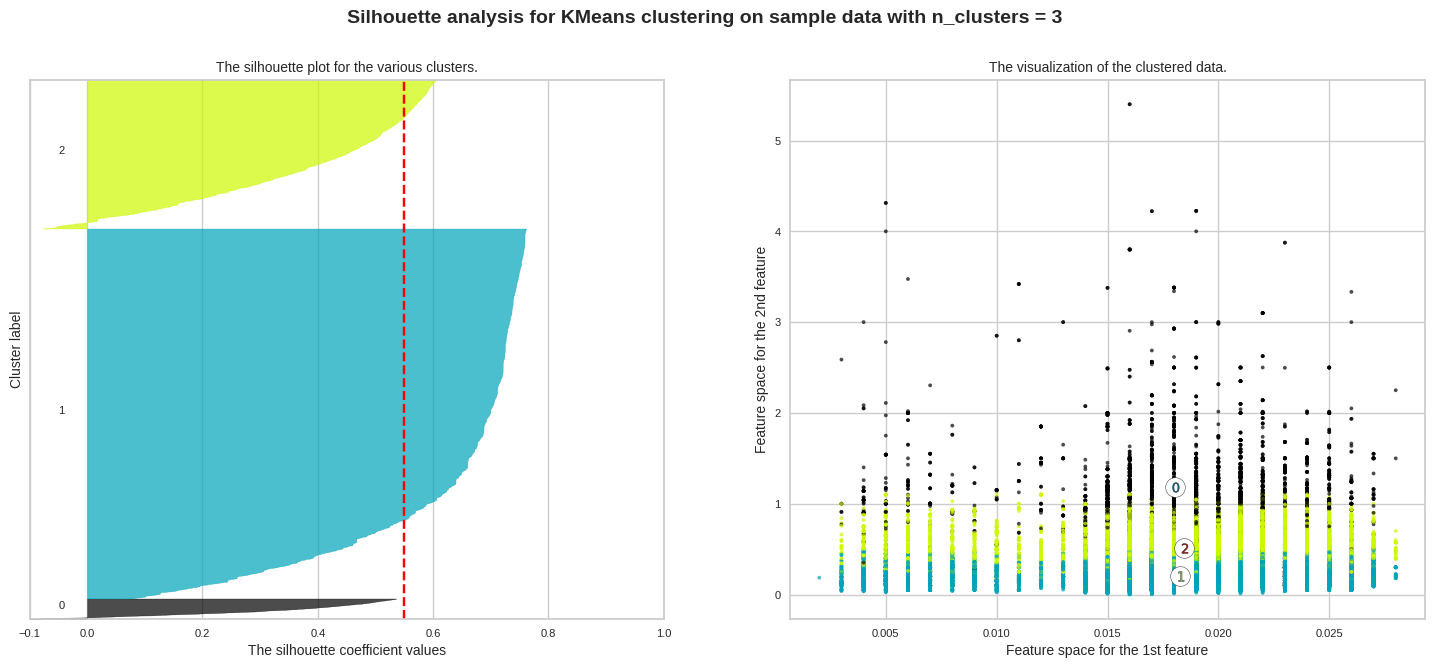

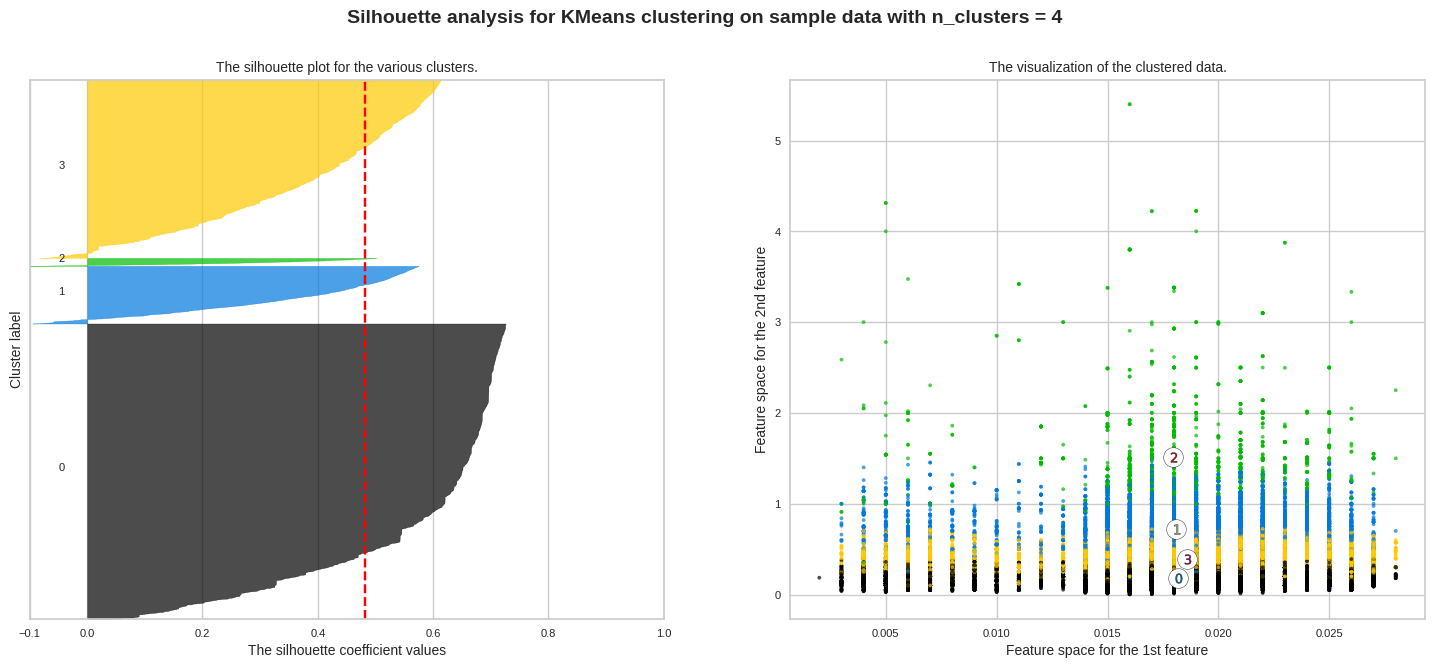

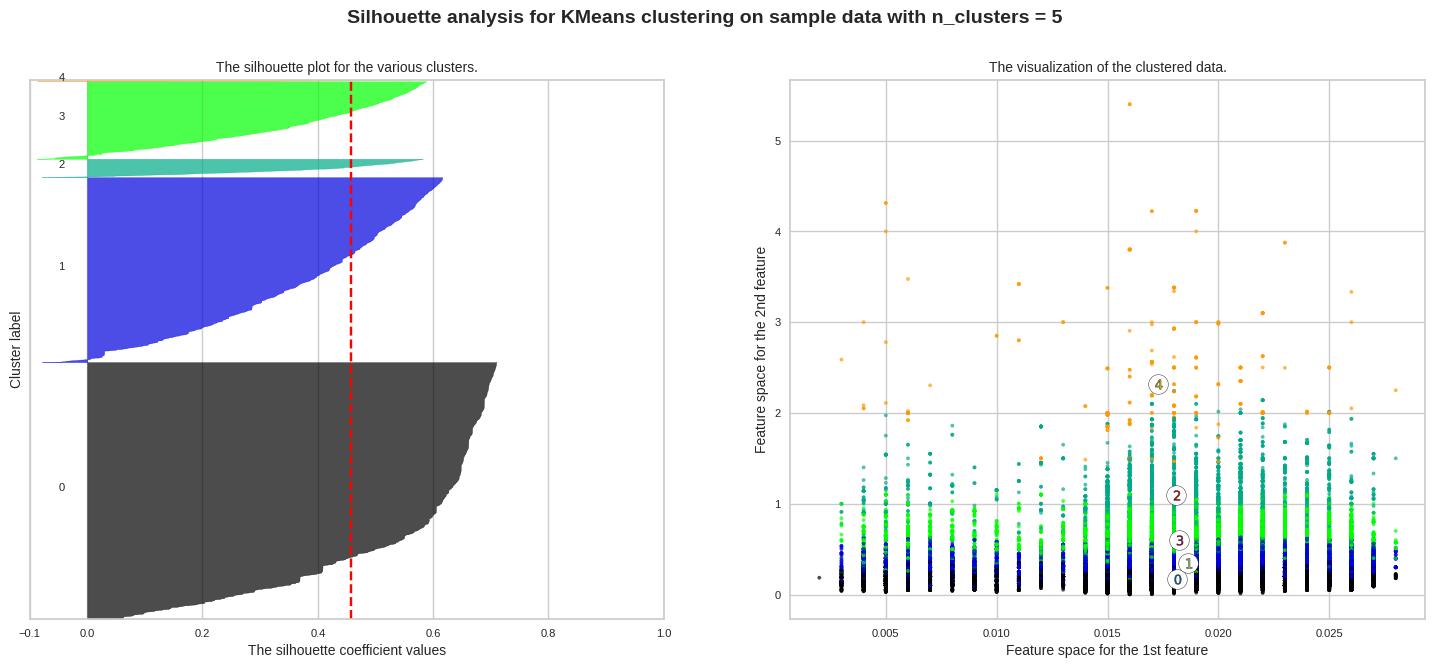

In [ ]:
silhoutte_analysis(kmeans,list(range(3,6)))

- As we can see Values ​​5 for n_clusters look more optimal than others.

- The silhouette score for each cluster in values 5 is above the average silhouette score

- Eventhough values 3 has higher score than 5, each cluster of 5 does not appear to overlap

### Build Cluster

**3 cluster**

In [ ]:
# make cluster
cluster_3 = kmeans.copy()

cluster_model = KMeans(n_clusters=3)   #------ Yang di ubah
cluster_model.fit_predict(cluster_3)
cluster_3['cluster'] = cluster_model.labels_
cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,last_txn_day,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m,cluster
account_id,,,,,
100000004,0.015,0.4000,1.0800,0.000370,2
100000008,0.020,0.2800,0.4299,0.000651,0
100000012,0.016,0.8000,1.0532,0.000760,2
100000014,0.020,1.4574,1.8848,0.000773,1
100000015,0.025,0.3900,0.4900,0.000796,0


last_txn_day: 


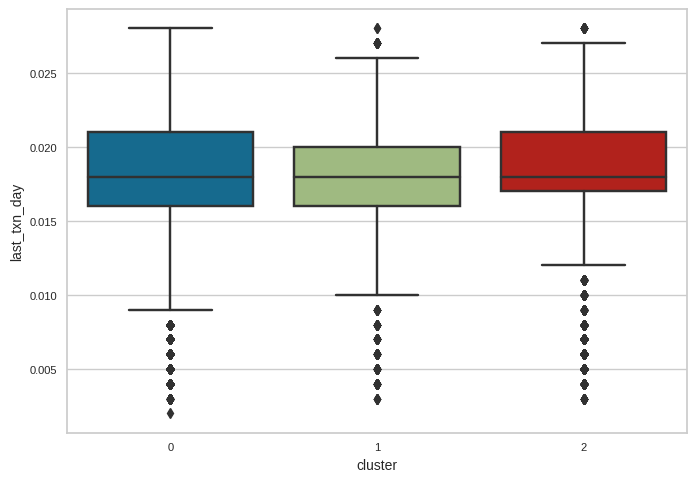

total_sales_promo_l6m: 


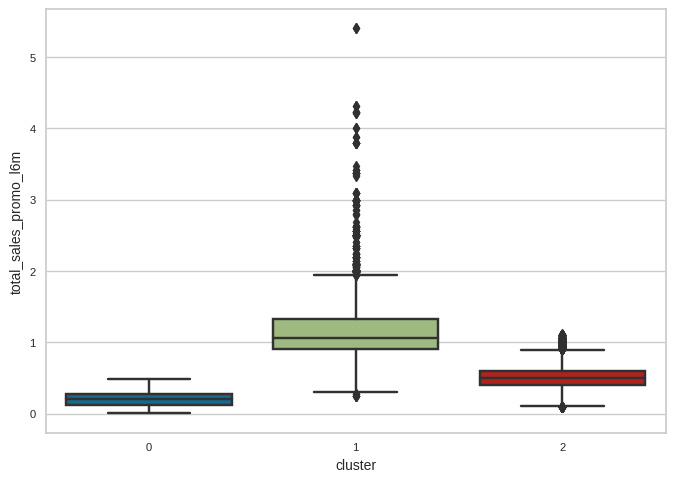

total_sales_l6m: 


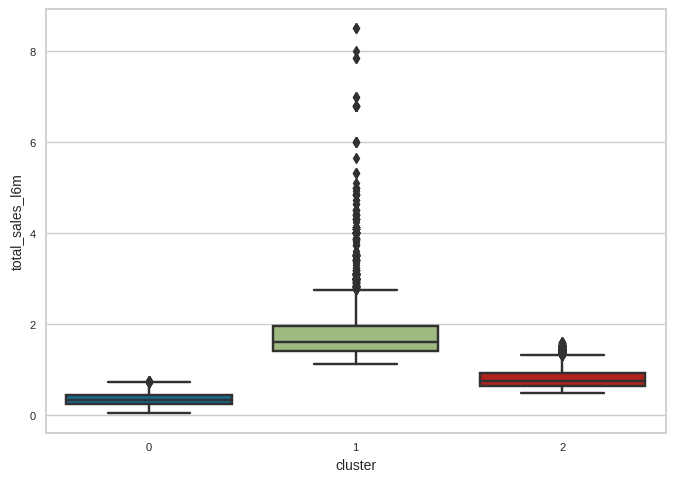

r_sales_promo_l6m: 


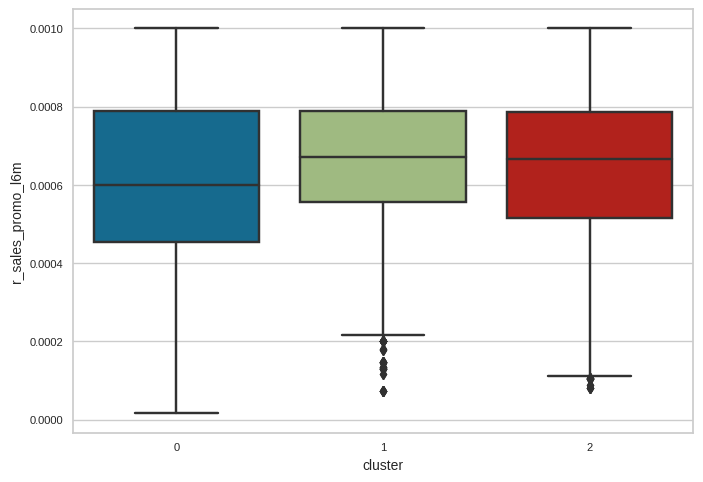

In [ ]:
list1 = ['last_txn_day','total_sales_promo_l6m','total_sales_l6m','r_sales_promo_l6m']

for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x='cluster', y=str(i), data=cluster_3)
    plt.show()

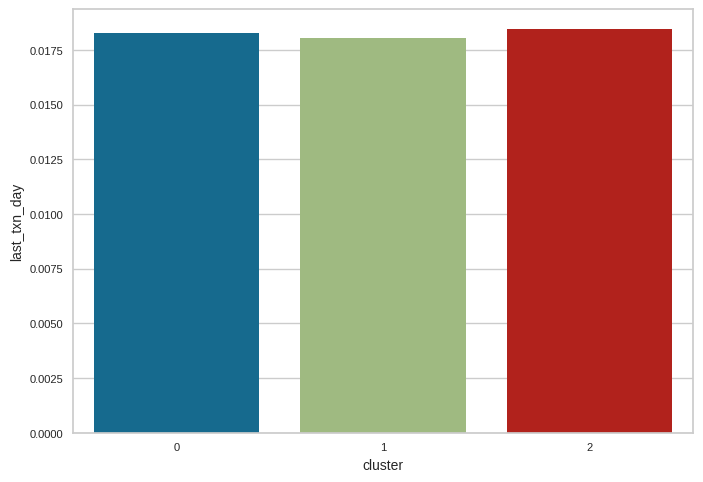

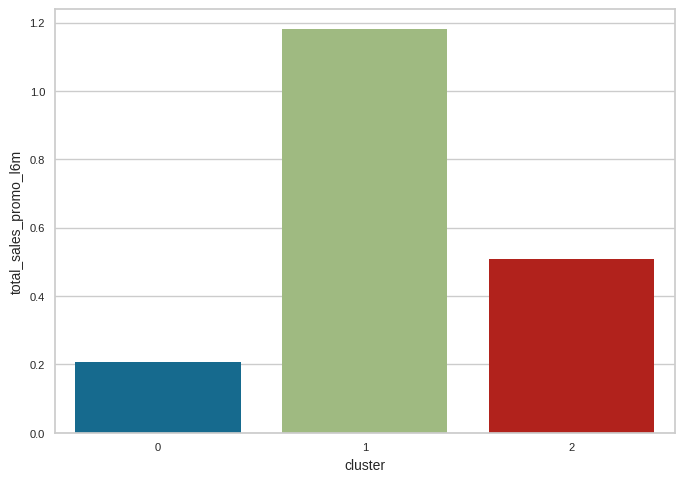

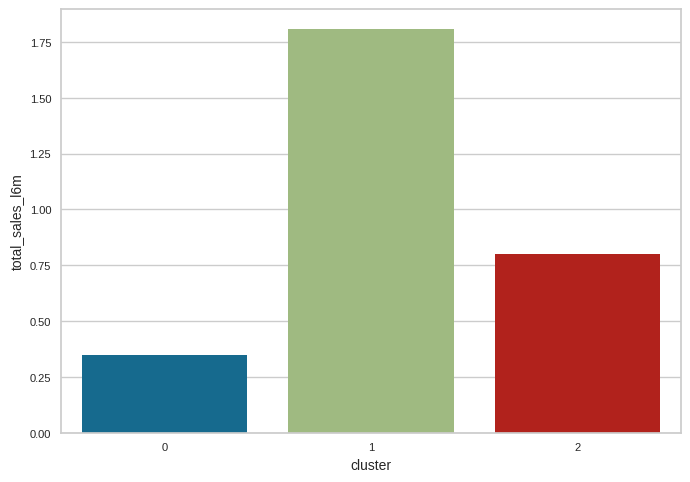

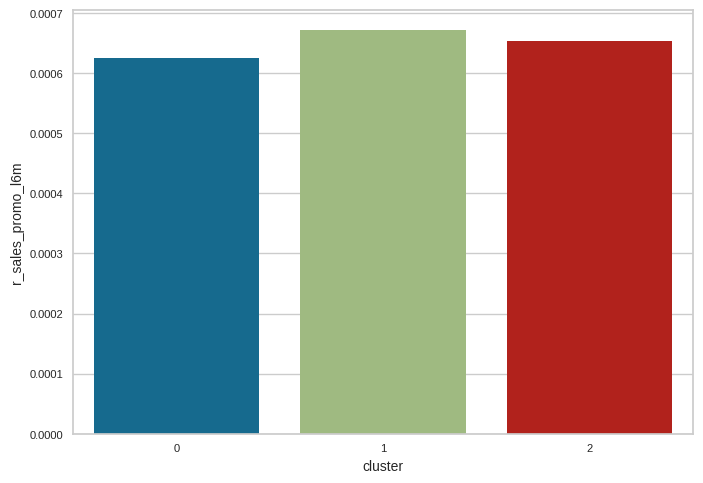

In [ ]:
avg_df = cluster_3.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

**Merge**

In [ ]:
cluster_3 = cluster_3.reset_index()
cluster_3

,account_id,last_txn_day,total_sales_promo_l6m,total_sales_l6m,r_sales_promo_l6m,cluster
0,100000004,0.015,0.4000,1.0800,0.000370,2
1,100000008,0.020,0.2800,0.4299,0.000651,0
2,100000012,0.016,0.8000,1.0532,0.000760,2
3,100000014,0.020,1.4574,1.8848,0.000773,1
4,100000015,0.025,0.3900,0.4900,0.000796,0
...,...,...,...,...,...,...
107653,101059832,0.004,0.2000,0.2000,0.001000,0
107654,101059843,0.008,0.1200,0.3600,0.000333,0
107655,101059857,0.019,0.1401,0.3703,0.000378,0
107656,101059860,0.016,0.3800,0.5850,0.000650,2


Now we assign the optimal number of clusters as 3 and create a new data frame with the predicted clusters.

In [ ]:
df_segmented = cluster_3.merge(df_cluster, how = 'inner',on = 'account_id')
df_segmented

,account_id,last_txn_day_x,total_sales_promo_l6m_x,total_sales_l6m_x,r_sales_promo_l6m_x,cluster,mcc,merchant_name,avg_txn_amt_l6m,avg_txn_amt_ltm,...,total_sales_l6m_y,r_sales_promo_l6m_y,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age,age_group,mob_group
0,100000004,0.015,0.4000,1.0800,0.000370,2,5262-MARKETPLACES,REVOSHOP,216.0,201.0,...,1080.0,0.370370,0.0,1750.0,4221.0,0.414594,0.0,47,"(40, 50]","(100.0, 150.0]"
1,100000008,0.020,0.2800,0.4299,0.000651,0,5262-MARKETPLACES,REVOSHOP,143.3,114.1,...,429.9,0.651314,1.0,1500.0,2510.2,0.597562,1.0,31,"(30, 40]","(100.0, 150.0]"
2,100000012,0.016,0.8000,1.0532,0.000760,2,5262-MARKETPLACES,REVOSHOP,263.3,242.7,...,1053.2,0.759590,1.0,1160.0,2912.4,0.398297,0.0,53,"(50, 60]","(50.0, 100.0]"
3,100000014,0.020,1.4574,1.8848,0.000773,1,5262-MARKETPLACES,REVOSHOP,235.6,210.0,...,1884.8,0.773239,1.0,3900.0,5670.0,0.687831,1.0,39,"(30, 40]","(50.0, 100.0]"
4,100000015,0.025,0.3900,0.4900,0.000796,0,5262-MARKETPLACES,REVOSHOP,98.0,77.5,...,490.0,0.795918,1.0,1890.0,3410.0,0.554252,1.0,33,"(30, 40]","(100.0, 150.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,0.004,0.2000,0.2000,0.001000,0,5262-MARKETPLACES,REVOSHOP,100.0,84.2,...,200.0,1.000000,1.0,500.0,1010.4,0.494854,0.0,44,"(40, 50]","(100.0, 150.0]"
107654,101059843,0.008,0.1200,0.3600,0.000333,0,5262-MARKETPLACES,REVOSHOP,120.0,113.4,...,360.0,0.333333,0.0,1000.0,2494.8,0.400834,0.0,30,"(20, 30]","(50.0, 100.0]"
107655,101059857,0.019,0.1401,0.3703,0.000378,0,5262-MARKETPLACES,REVOSHOP,52.9,36.8,...,370.3,0.378342,0.0,840.0,1030.4,0.815217,1.0,43,"(40, 50]","(100.0, 150.0]"
107656,101059860,0.016,0.3800,0.5850,0.000650,2,5262-MARKETPLACES,REVOSHOP,195.0,147.3,...,585.0,0.649573,1.0,2000.0,3387.9,0.590336,1.0,36,"(30, 40]","(100.0, 150.0]"


### Copy Data for Modelling

In [ ]:
df_segmented.to_pickle('cluster.pickle')

## Visualisasi cluster

### Cluster Interpretation

In [ ]:
avg_data = df_segmented.groupby(['cluster'], as_index=False).mean()
avg_data

<ipython-input-110-f04b16874b5c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_data = df_segmented.groupby(['cluster'], as_index=False).mean()


,cluster,account_id,last_txn_day_x,total_sales_promo_l6m_x,total_sales_l6m_x,r_sales_promo_l6m_x,avg_txn_amt_l6m,avg_txn_amt_ltm,avg_promo_txn_amt_l6m,avg_promo_txn_amt_ltm,...,promo_channel,total_sales_promo_l6m_y,total_sales_l6m_y,r_sales_promo_l6m_y,promo_sntv_l6m,total_sales_promo_ltm,total_sales_ltm,r_sales_promo_ltm,promo_sntv_ltm,age
0,0,1.005319e+08,0.018443,0.507948,0.798524,0.000654,161.830381,132.688571,160.958897,153.099199,...,0.297681,507.947851,798.524356,0.654445,0.763740,1590.939134,2669.652805,0.616091,0.719113,40.518931
1,1,1.005331e+08,0.018261,0.207818,0.346805,0.000625,102.959842,88.985694,101.886997,97.638945,...,0.302144,207.817607,346.805427,0.625032,0.622999,954.594189,1629.610816,0.595525,0.666319,40.517283
2,2,1.005238e+08,0.018040,1.180006,1.806090,0.000671,305.698983,243.179231,302.443251,281.359801,...,0.293052,1180.005707,1806.089727,0.671390,0.831017,3145.334988,5426.541141,0.608910,0.705459,40.735236


In [ ]:
df_segmented.groupby(['cluster'], as_index=False)['account_id'].nunique()

,cluster,account_id
0,0,29713
1,1,73915
2,2,4030


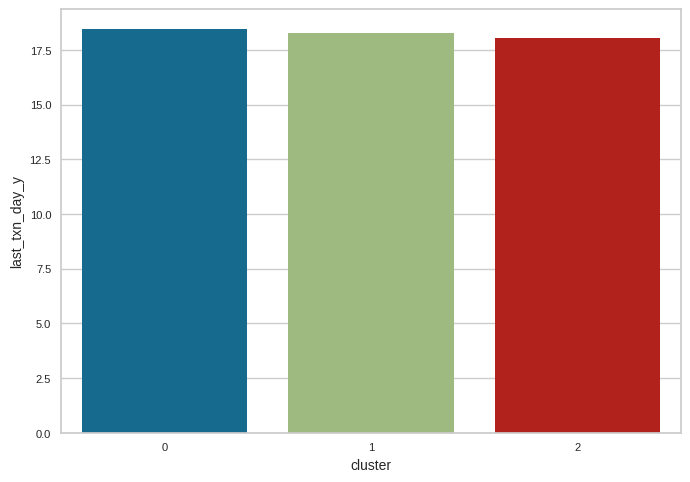

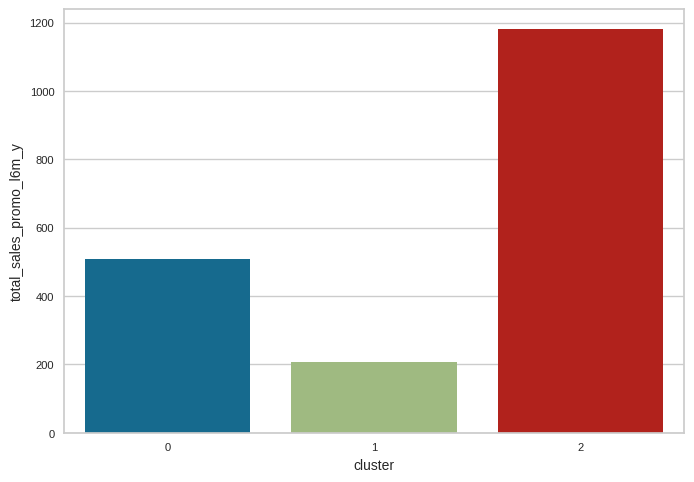

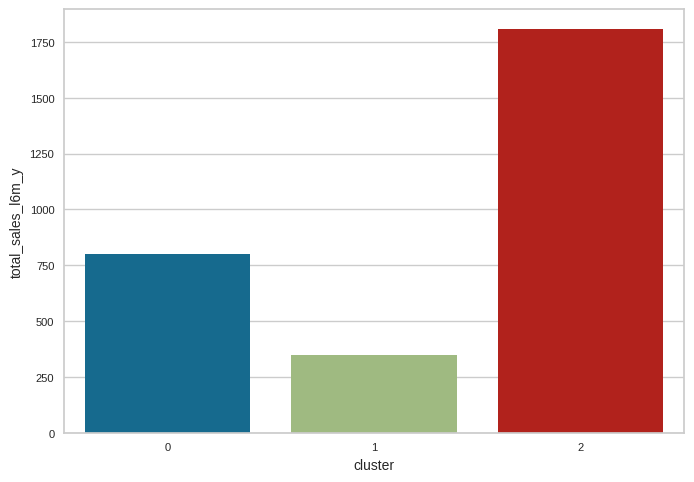

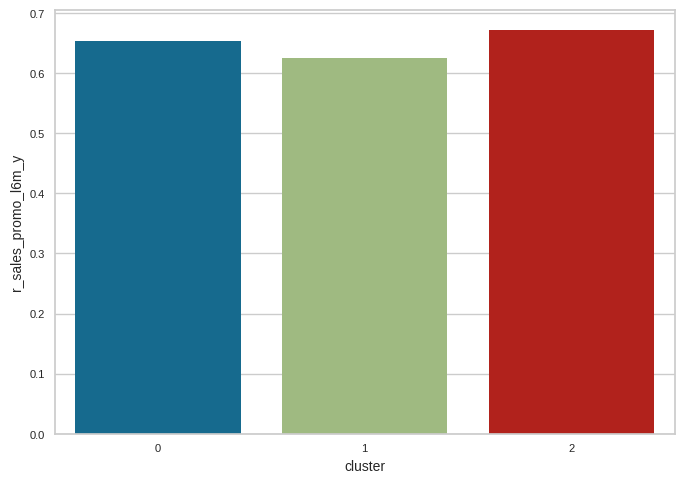

In [ ]:
list2 = ['last_txn_day_y','total_sales_promo_l6m_y','total_sales_l6m_y','r_sales_promo_l6m_y']
for i in list2:
    sns.barplot(x='cluster',y=str(i),data=avg_data)
    plt.show()

Purpose:

To increase the use of RevoBank credit cards which provide more revenue with low promotional fees, by identifyiing which segements that have `higher average sales per client, higher average transaction frequency per client, higher revenue generated and/or a larger proportion of promo-sensitive clients` compare to other

Things can be analyzed :

- Sales
- Transaction frequency per client
- Revenue generated to promo
- Promo-sensitive clients
- Last transaction
- Cost of promotion
- MOB

#### Sales

In [ ]:
# rata-rata total sales per client selama menjadi nasabah (6months)
df_segmented.groupby(['cluster'], as_index = False)['total_sales_promo_l6m_y'].mean()

,cluster,total_sales_promo_l6m_y
0,0,507.947851
1,1,207.817607
2,2,1180.005707


<Axes: xlabel='cluster', ylabel='total_sales_promo_l6m_y'>

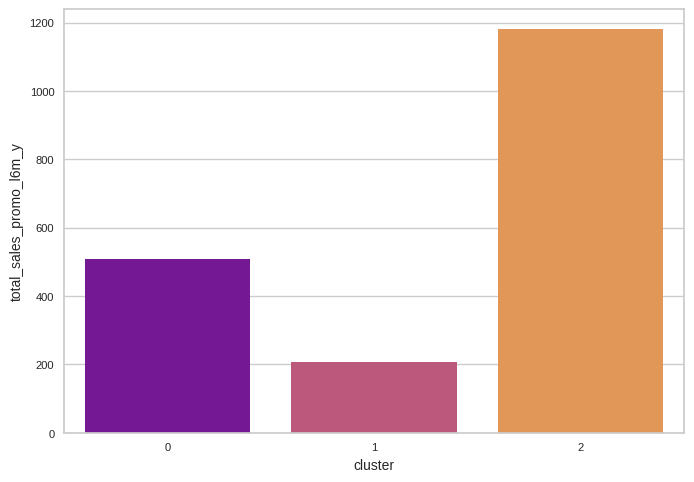

In [ ]:
sns.barplot(x='cluster',y='total_sales_promo_l6m_y',palette="plasma",data=avg_data)

Insight :

- 0 = Average total sales = 1,180 (Highest)
- 1 = Average total sales = 507.94
- 2 = Average total sales = 207.82 (Lowest)

#### Income

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['proxy_income'].mean()

,cluster,proxy_income
0,0,37300.952681
1,1,38506.759792
2,2,36678.419355


<Axes: xlabel='cluster', ylabel='proxy_income'>

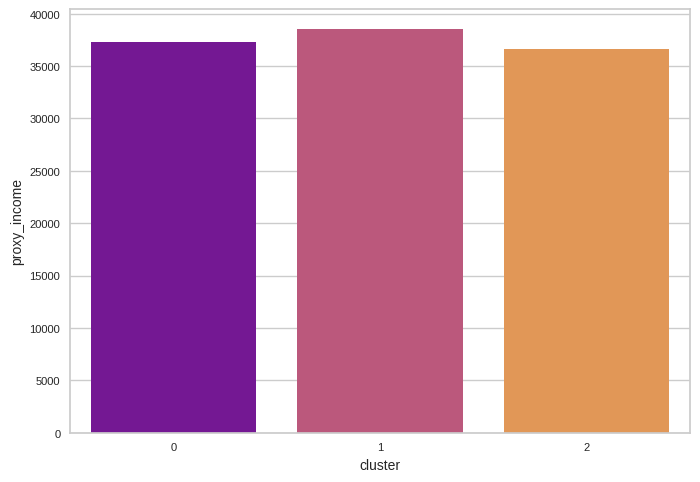

In [ ]:
sns.barplot(x='cluster',y='proxy_income',palette="plasma",data=avg_data)

#### Transaction frequency per client

In [ ]:
# avg transaction over past 6 months
df_segmented.groupby(['cluster'], as_index = False)['promo_txn_cnt_l6m'].mean()

,cluster,promo_txn_cnt_l6m
0,0,3.699997
1,1,2.375864
2,2,4.594789


<Axes: xlabel='cluster', ylabel='promo_txn_cnt_l6m'>

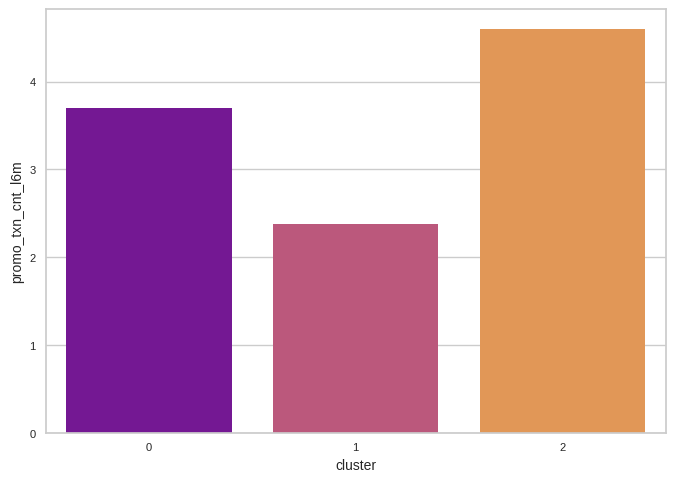

In [ ]:
sns.barplot(x='cluster',y='promo_txn_cnt_l6m',palette="plasma",data=avg_data)

Insight :

- 0 = Average transaction frequency = 4.6 (Highest)
- 1 = Average transaction frequency = 3.7
- 2 = Average transaction frequency = 2.4 (Lowest)

#### Revenue generated to promo

In [ ]:
# avg revenue generated to promo
df_segmented.groupby(['cluster'], as_index = False)['total_sales_promo_l6m_y'].mean()* 0.024

,cluster,total_sales_promo_l6m_y
0,0.000,12.190748
1,0.024,4.987623
2,0.048,28.320137


Insight :

- 0 = Average revenue = 28.3 (Highest)
- 1 = Average revenue = 12.2
- 2 = Average revenue = 5 (Lowest)

#### Promo-sensitive clients

In [ ]:
# proportion of promo-sensitive clients
df_segmented.groupby(['cluster'], as_index = False)['promo_sntv_l6m'].value_counts(normalize=True)

,cluster,promo_sntv_l6m,proportion
0,0,1.0,0.763740
1,0,0.0,0.236260
2,1,1.0,0.622999
3,1,0.0,0.377001
4,2,1.0,0.831017
5,2,0.0,0.168983


Insight :

Clusters 0,1,2 have a higher proportion of promo-sensitive clients than non promo-sensitive and cluster 0 has the largest proportion of promo-sensitive clients among others

#### Last transaction

In [ ]:
# avg of last transaction
df_segmented.groupby(['cluster'], as_index = False)['last_txn_day_y'].mean()

In [ ]:
sns.barplot(x='cluster',y='last_txn_day_y',palette="plasma",data=avg_data)

Insight :

- 0 = Average income = 18.04 (Lowest)
- 1 = Average income = 18.44 (Highest)
- 2 = Average income = 18.3

#### Total cost

In [ ]:
# avg of total cost
df_segmented.groupby(['cluster'], as_index = False)['promo_txn_cnt_l6m'].mean()*1.5

,cluster,promo_txn_cnt_l6m
0,0.0,5.549995
1,1.5,3.563796
2,3.0,6.892184


Insight :

- 0 = Average income = 7 (Highest)
- 1 = Average income = 6
- 2 = Average income = 4 (Lowest)

#### MOB

In [ ]:
# avg of mob
df_segmented.groupby(['cluster'], as_index = False)['mob'].mean()

,cluster,mob
0,0,96.197422
1,1,103.676899
2,2,92.776179


<Axes: xlabel='cluster', ylabel='mob'>

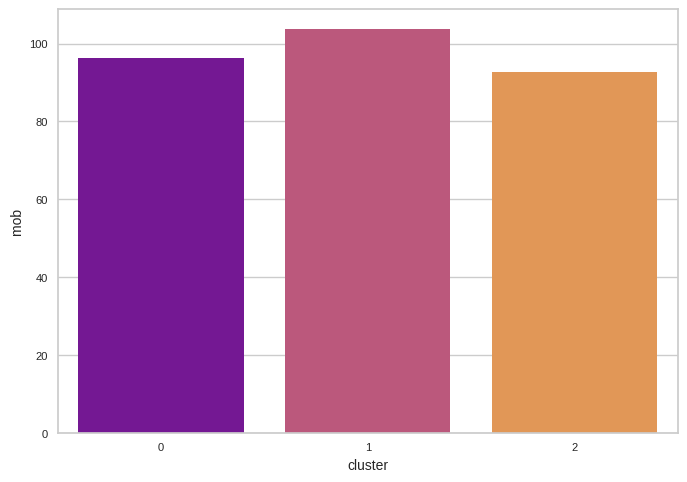

In [ ]:
sns.barplot(x='cluster',y='mob',palette="plasma",data=avg_data)

Insight :

- 0 = Average income = 93 (Lowest)
- 1 = Average income = 96.2
- 2 = Average income = 104 (Highest)

### PPT

Link to Deck :

https://docs.google.com/presentation/d/1Abv8Az1d3yLZXK442jlmKu-t5W3c3CxxLvKyIVmlKB4/edit?usp=sharing